<a href="https://colab.research.google.com/github/AhmedTalima23/DEPI_Final_Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Churn Prediction & Analysis Project

- Team members:

Ahmed Mohamed Mahmoud ( **Team Leader** )

Malak Torky

Shrouk Emam

Seif Ahmed

Theodore naguib

Salah Mohamed

---

**Supervised By Eng\ Mahmoud Talaat**

---


Here’s a structured plan to accomplish the tasks and deliverables for our churn prediction project:

---

### *1. Data Collection*
- *Objective*: Acquire a dataset suitable for churn prediction.
- *Steps*:
  1. Search for churn datasets on platforms like:

  2. Ensure the dataset includes:
     - Customer demographics (e.g., age, gender, location).
     - Usage patterns (e.g., monthly usage, logins, service calls).
     - Subscription details (e.g., contract type, tenure, monthly charges).
     - Target variable: Churn status (e.g., "Yes" or "No").

---

### *2. Data Exploration*
- *Objective*: Understand the dataset’s structure and identify relationships, missing values, and outliers.
- *Steps*:
  1. Load the dataset using Python libraries like pandas and numpy.
  2. Perform initial checks:
     - Use df.info() to check data types and missing values.
     - Use df.describe() to summarize numerical features.
     - Use df.isnull().sum() to identify missing values.
     - Use df.duplicated().sum() to check for duplicates.
  3. Analyze distributions:
     - Plot histograms or boxplots for numerical features.
     - Use bar plots for categorical features.
  4. Identify outliers using statistical methods (e.g., IQR or Z-score).

---

### *3. Preprocessing and Feature Engineering*
- *Objective*: Clean and prepare the dataset for machine learning.
- *Steps*:
  1. *Handle Missing Data*:
     - Use imputation (e.g., mean/median for numerical, mode for categorical) or remove rows/columns with excessive missing values.
  2. *Handle Outliers*:
     - Cap/floor outliers or remove them based on domain knowledge.
  3. *Feature Transformation*:
     - Scale numerical features using StandardScaler or MinMaxScaler.
     - Encode categorical features using OneHotEncoder or LabelEncoder.
  4. *Feature Engineering*:
     - Create new features (e.g., tenure in years, average monthly spend).
     - Generate interaction features (e.g., usage per contract type).

---

### *4. Exploratory Data Analysis (EDA)*
- *Objective*: Visualize patterns, correlations, and relationships in the data.
- *Steps*:
  1. *Univariate Analysis*:
     - Plot histograms, boxplots, and bar charts for individual features.
  2. *Bivariate Analysis*:
     - Use scatterplots, pair plots, and correlation heatmaps to analyze relationships between features.
  3. *Multivariate Analysis*:
     - Use pair plots or grouped bar charts to analyze interactions between multiple features.
  4. *Churn Analysis*:
     - Compare churn rates across different customer segments (e.g., by gender, contract type).
  5. *Document Insights*:
     - Summarize key findings (e.g., "Customers with month-to-month contracts have higher churn rates").

---

### *Tools and Libraries*
- *Python Libraries*:
  - Data Manipulation: pandas, numpy.
  - Visualization: matplotlib, seaborn, plotly.
  - Preprocessing: scikit-learn (for scaling, encoding, imputation).
- *Notebook*: Jupyter Notebook or Google Colab.

---

Milestone 1: Data Collection, Exploration, and Preprocessing

# Loading Libraries and Collecting data

In [214]:
# Essential Libraries for EDA

# Data Manipulation
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Display Settings
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_theme(style='whitegrid')
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import copy
print("Libraries imported successfully!")



Libraries imported successfully!


# Load and Explore the Dataset

Purpose: Load the dataset into the notebook for analysis

In [215]:

df = pd.read_csv('test.csv')


# Data Exploration

Display the first few rows of the dataset to get a sense of the data.


In [216]:
df.head()

Employee ID  Age Gender  Years at Company    Job Role  Monthly Income  \
0        52685   36   Male                13  Healthcare            8029   
1        30585   35   Male                 7   Education            4563   
2        54656   50   Male                 7   Education            5583   
3        33442   58   Male                44       Media            5525   
4        15667   39   Male                24   Education            4604   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent             High            Average                     1   
1              Good             High            Average                     1   
2              Fair             High            Average                     3   
3              Fair        Very High               High                     0   
4              Good             High            Average                     0   

   ... Number of Dependents  Job Level Company Size Company Tenure  \
0  ...                    1        Mid        Large             22   
1  ...                    4      Entry       Medium             27   
2  ...                    2     Senior       Medium             76   
3  ...                    4      Entry       Medium             96   
4  ...                    6        Mid        Large             45   

   Remote Work Leadership Opportunities Innovation Opportunities  \
0           No                       No                       No   
1           No                       No                       No   
2           No                       No                      Yes   
3           No                       No                       No   
4          Yes                       No                       No   

   Company Reputation Employee Recognition Attrition  
0                Poor               Medium    Stayed  
1                Good                 High      Left  
2                Good                  Low    Stayed  
3                Poor                  Low      Left  
4                Good                 High    Stayed  

[5 rows x 24 columns]

In [217]:
# Getting the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Displaying column names
print("Column Names:")
print(df.columns.tolist())

The dataset contains 74498 rows and 24 columns.

Column Names:
['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


***Now let's understand and define the features of the dataset***

**Employee ID:**
A unique identifier assigned to each employee for tracking and reference.

**Age:**
The age of the employee in years.

**Gender:**
The gender identity of the employee (e.g., Male, Female, Non-Binary).

**Years at Company:**
The total number of years an employee has been working at the organization.

**Job Role:**
The specific position or function performed by the employee within the company (e.g., Data Analyst, Software Engineer).

**Monthly Income:**
The employee’s gross monthly salary in the local currency.

**Work-Life Balance:**
A measure of how well the employee perceives their ability to balance professional responsibilities with personal life (e.g., rated on a scale from 1 to 5).

**Job Satisfaction:**
The employee's self-reported level of satisfaction with their current job role (e.g., rated on a scale from 1 to 5).

**Performance Rating:**
An evaluation of the employee’s performance, typically based on annual reviews (e.g., rated on a scale from 1 to 5).

**Number of Promotions:**
The total number of promotions the employee has received during their tenure at the company.

**Overtime:**
Indicates whether the employee works overtime beyond regular working hours (e.g., Yes/No).

**Distance from Home:**
The physical distance (in kilometers or miles) between the employee’s residence and the workplace.

**Education Level:**
The highest level of education attained by the employee (e.g., Bachelor's, Master's, PhD).

**Marital Status:**
The employee’s current marital status (e.g., Single, Married, Divorced).

**Number of Dependents:**
The number of individuals financially dependent on the employee.

**Job Level:**
The hierarchical level of the employee’s position within the company (e.g., Entry-level, Mid-level, Senior-level).

**Company Size:**
The total number of employees in the organization (e.g., Small, Medium, Large).

**Company Tenure:**
The duration (in years) the employee has been with the company.

**Remote Work:**
Indicates whether the employee works remotely or on-site (e.g., Yes/No).

**Leadership Opportunities:**
Availability and participation in leadership development programs or managerial roles (e.g., Yes/No).

**Innovation Opportunities:**
Access to and involvement in innovative projects or processes within the organization (e.g., Yes/No).

**Company Reputation:**
The perceived reputation of the company in the industry and among employees (e.g., rated on a scale from 1 to 5).

**Employee Recognition:**
Frequency and quality of acknowledgment received for performance and contributions (e.g., Yes/No or rated on a scale).

**Attrition:**
Indicates whether the employee has left the company (e.g., Yes/No).

In [218]:
for col in df.columns :
    print(f"{col} : number of unique values is : {df[col].nunique()}")
    print("==============================================================")

Employee ID : number of unique values is : 74498
Age : number of unique values is : 42
Gender : number of unique values is : 2
Years at Company : number of unique values is : 51
Job Role : number of unique values is : 5
Monthly Income : number of unique values is : 9842
Work-Life Balance : number of unique values is : 4
Job Satisfaction : number of unique values is : 4
Performance Rating : number of unique values is : 4
Number of Promotions : number of unique values is : 5
Overtime : number of unique values is : 2
Distance from Home : number of unique values is : 99
Education Level : number of unique values is : 5
Marital Status : number of unique values is : 3
Number of Dependents : number of unique values is : 7
Job Level : number of unique values is : 3
Company Size : number of unique values is : 3
Company Tenure : number of unique values is : 127
Remote Work : number of unique values is : 2
Leadership Opportunities : number of unique values is : 2
Innovation Opportunities : number 

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

The data.info() function in pandas is used to display concise summary information about a DataFrame. It provides a quick overview of the structure of the dataset, including important details about the data types and completeness of each column.

**All the data types of the features Are right and in the right order**

---

**Summarize data distributions and basic statistics**

In [220]:
# Showing some statistics about the distribution of the dataset
df.describe()

Employee ID      Age  Years at Company  Monthly Income  \
count     74498.00 74498.00          74498.00        74498.00   
mean      37249.50    38.53             15.72         7299.38   
std       21505.86    12.08             11.22         2152.51   
min           1.00    18.00              1.00         1226.00   
25%       18625.25    28.00              7.00         5652.00   
50%       37249.50    39.00             13.00         7348.00   
75%       55873.75    49.00             23.00         8876.00   
max       74498.00    59.00             51.00        16149.00   

       Number of Promotions  Distance from Home  Number of Dependents  \
count              74498.00            74498.00              74498.00   
mean                   0.83               49.99                  1.65   
std                    1.00               28.51                  1.55   
min                    0.00                1.00                  0.00   
25%                    0.00               25.00                  0.00   
50%                    1.00               50.00                  1.00   
75%                    2.00               75.00                  3.00   
max                    4.00               99.00                  6.00   

       Company Tenure  
count        74498.00  
mean            55.73  
std             25.40  
min              2.00  
25%             36.00  
50%             56.00  
75%             76.00  
max            128.00

**Key insights about the Statistical information of the Dataset**

- Employee Demographics & Experience:

The average age of employees is 38 years, with the majority ranging between 28 and 49 years, indicating a workforce with diverse levels of professional maturity.
Employees have an average tenure of 15.7 years, with a maximum of 51 years, suggesting a significant proportion of long-serving staff.

- Income Distribution:

The average monthly income is 7,299, with salaries ranging from 1,226 to 16,149, indicating substantial variation in compensation across roles and experience levels.
50% of employees earn 7,348 or less, while 25% earn above 8,876, highlighting a skew toward mid-level earnings.

- Career Progression:

On average, employees receive 0.83 promotions during their tenure, with 75% of employees receiving two or fewer promotions, which may indicate limited career advancement opportunities.
A small subset of employees (maximum of 4 promotions) experiences higher career mobility.

- Commuting Patterns:

The average distance employees travel to work is approximately 50 units, with distances ranging from 1 to 99 units, reflecting diverse geographic distributions.
50% of employees live within 50 units of the workplace, while 25% travel 75 units or more, which may impact work-life balance and attrition rates.

- Family and Personal Commitments:

Employees have an average of 1.65 dependents, with a range of 0 to 6, suggesting that a notable portion of the workforce has familial responsibilities that may influence retention.

- Workforce Diversity & Stability:

The dataset reflects a stable workforce, with 50% of employees remaining for at least 56 tenure units (potentially months or years).
A substantial portion of the workforce (25%) has a tenure exceeding 76 units, suggesting a core group of long-term employees.


---


**Check for Duplications**

In [221]:

print("Duplicates :",df.duplicated().sum())

Duplicates : 0


---

# Data Cleaning

In [222]:
# identify the missing values
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

**There is no null or missing values in our data**

---

**Dropping the unwanted Features**

In [223]:
df.drop(columns = ['Employee ID'], inplace = True )

---

Saving the Object Data type Data in One List

In [224]:
object_col = []
for col in df.columns:
    if df[col].dtype == object and  len(df[col].unique()) <= 30:
        object_col.append(col)
        print(f"{col} : {df[col].unique()}")
        print(df[col].value_counts())
        print("============================================")
object_col.remove('Attrition')

Gender : ['Male' 'Female']
Gender
Male      40826
Female    33672
Name: count, dtype: int64
Job Role : ['Healthcare' 'Education' 'Media' 'Technology' 'Finance']
Job Role
Technology    19322
Healthcare    17074
Education     15658
Media         11996
Finance       10448
Name: count, dtype: int64
Work-Life Balance : ['Excellent' 'Good' 'Fair' 'Poor']
Work-Life Balance
Good         28158
Fair         22529
Excellent    13432
Poor         10379
Name: count, dtype: int64
Job Satisfaction : ['High' 'Very High' 'Medium' 'Low']
Job Satisfaction
High         37245
Very High    15079
Medium       14717
Low           7457
Name: count, dtype: int64
Performance Rating : ['Average' 'High' 'Below Average' 'Low']
Performance Rating
Average          44719
High             14910
Below Average    11139
Low               3730
Name: count, dtype: int64
Overtime : ['Yes' 'No']
Overtime
No     50157
Yes    24341
Name: count, dtype: int64
Education Level : ['Master’s Degree' 'Associate Degree' 'High School' '

Saving the Numeric Data Type Data in One List

In [225]:
numeric_df =[]
for col in df.columns:
    if df[col].dtype!= object:
        numeric_df.append(col)
print(numeric_df)


['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']


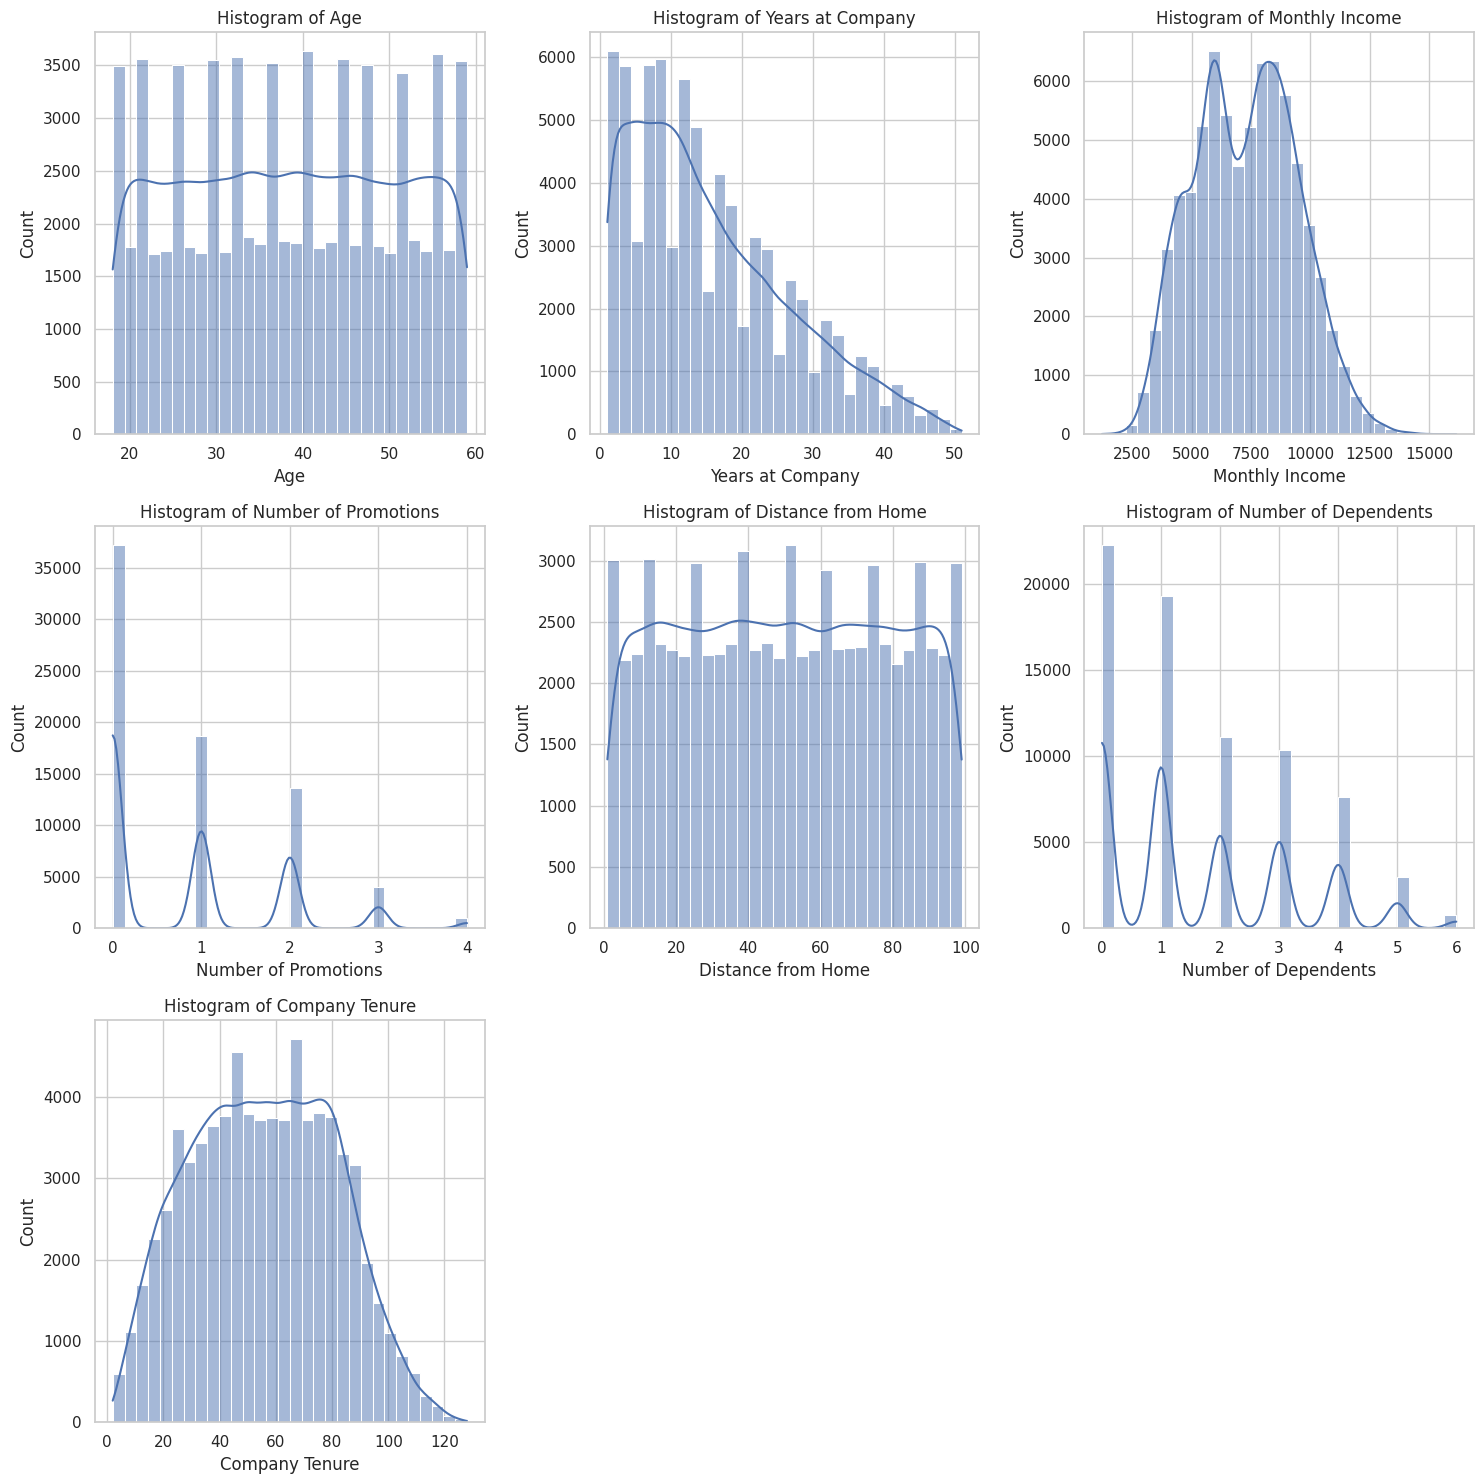

In [226]:
num_cols = len(numeric_df)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))

axes = axes.flatten()  # Flatten for easy iteration

for i, col in enumerate(numeric_df):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Conclusions And Insights From the Data Features Distributions

**- Age Distribution:**

Uniform Distribution: The age range is approximately 18 to 59 years, and the distribution appears relatively even across all age groups.
Insight: The company has a balanced age diversity, suggesting no particular age group dominates the workforce.

**- Years at Company:**

Right-Skewed Distribution: Most employees have fewer years of service, with a significant drop-off after 20 years.
Insight: High employee turnover or frequent hiring of new staff. Consider investigating retention strategies for experienced employees.

**- Monthly Income:**

Bimodal Distribution: Two distinct peaks suggest two salary clusters – one around $5,000-$7,500 and another at $8,000-$10,000.
Insight: This may indicate different job levels or pay bands. Explore whether these align with job roles or tenure levels.

**- Number of Promotions:**

Highly Skewed: Most employees have 0-1 promotions, with very few having 3 or more.
Insight: Limited career progression for most staff. Consider expanding promotion opportunities to improve employee satisfaction and retention.

**- Distance from Home:**

Even Distribution: Employees live at varying distances (1 to 99 km), without a clear pattern.
Insight: No major geographical clustering is observed. However, employees living further might face commuting challenges, which could affect
attrition.

**- Number of Dependents:**

Right-Skewed: Most employees have 0-2 dependents, while a small proportion has 3-6 dependents.
Insight: Employees with more dependents may require additional work-life balance policies or family-related benefits.

**- Company Tenure:**

Normal Distribution: Tenure is centered around 55 years, with most employees having 20-90 years of combined service.
Insight: This suggests a balanced mix of new and tenured employees, which can foster both innovation and institutional knowledge.

***Overall Recommendations:***

Retention Programs: Address high turnover for experienced staff.

Career Growth: Create clearer promotion pathways and upskilling opportunities.

Compensation Structure: Investigate the bimodal salary distribution for fairness and transparency.

Work-Life Balance: Offer flexible policies for employees with long commutes or multiple dependents.

---

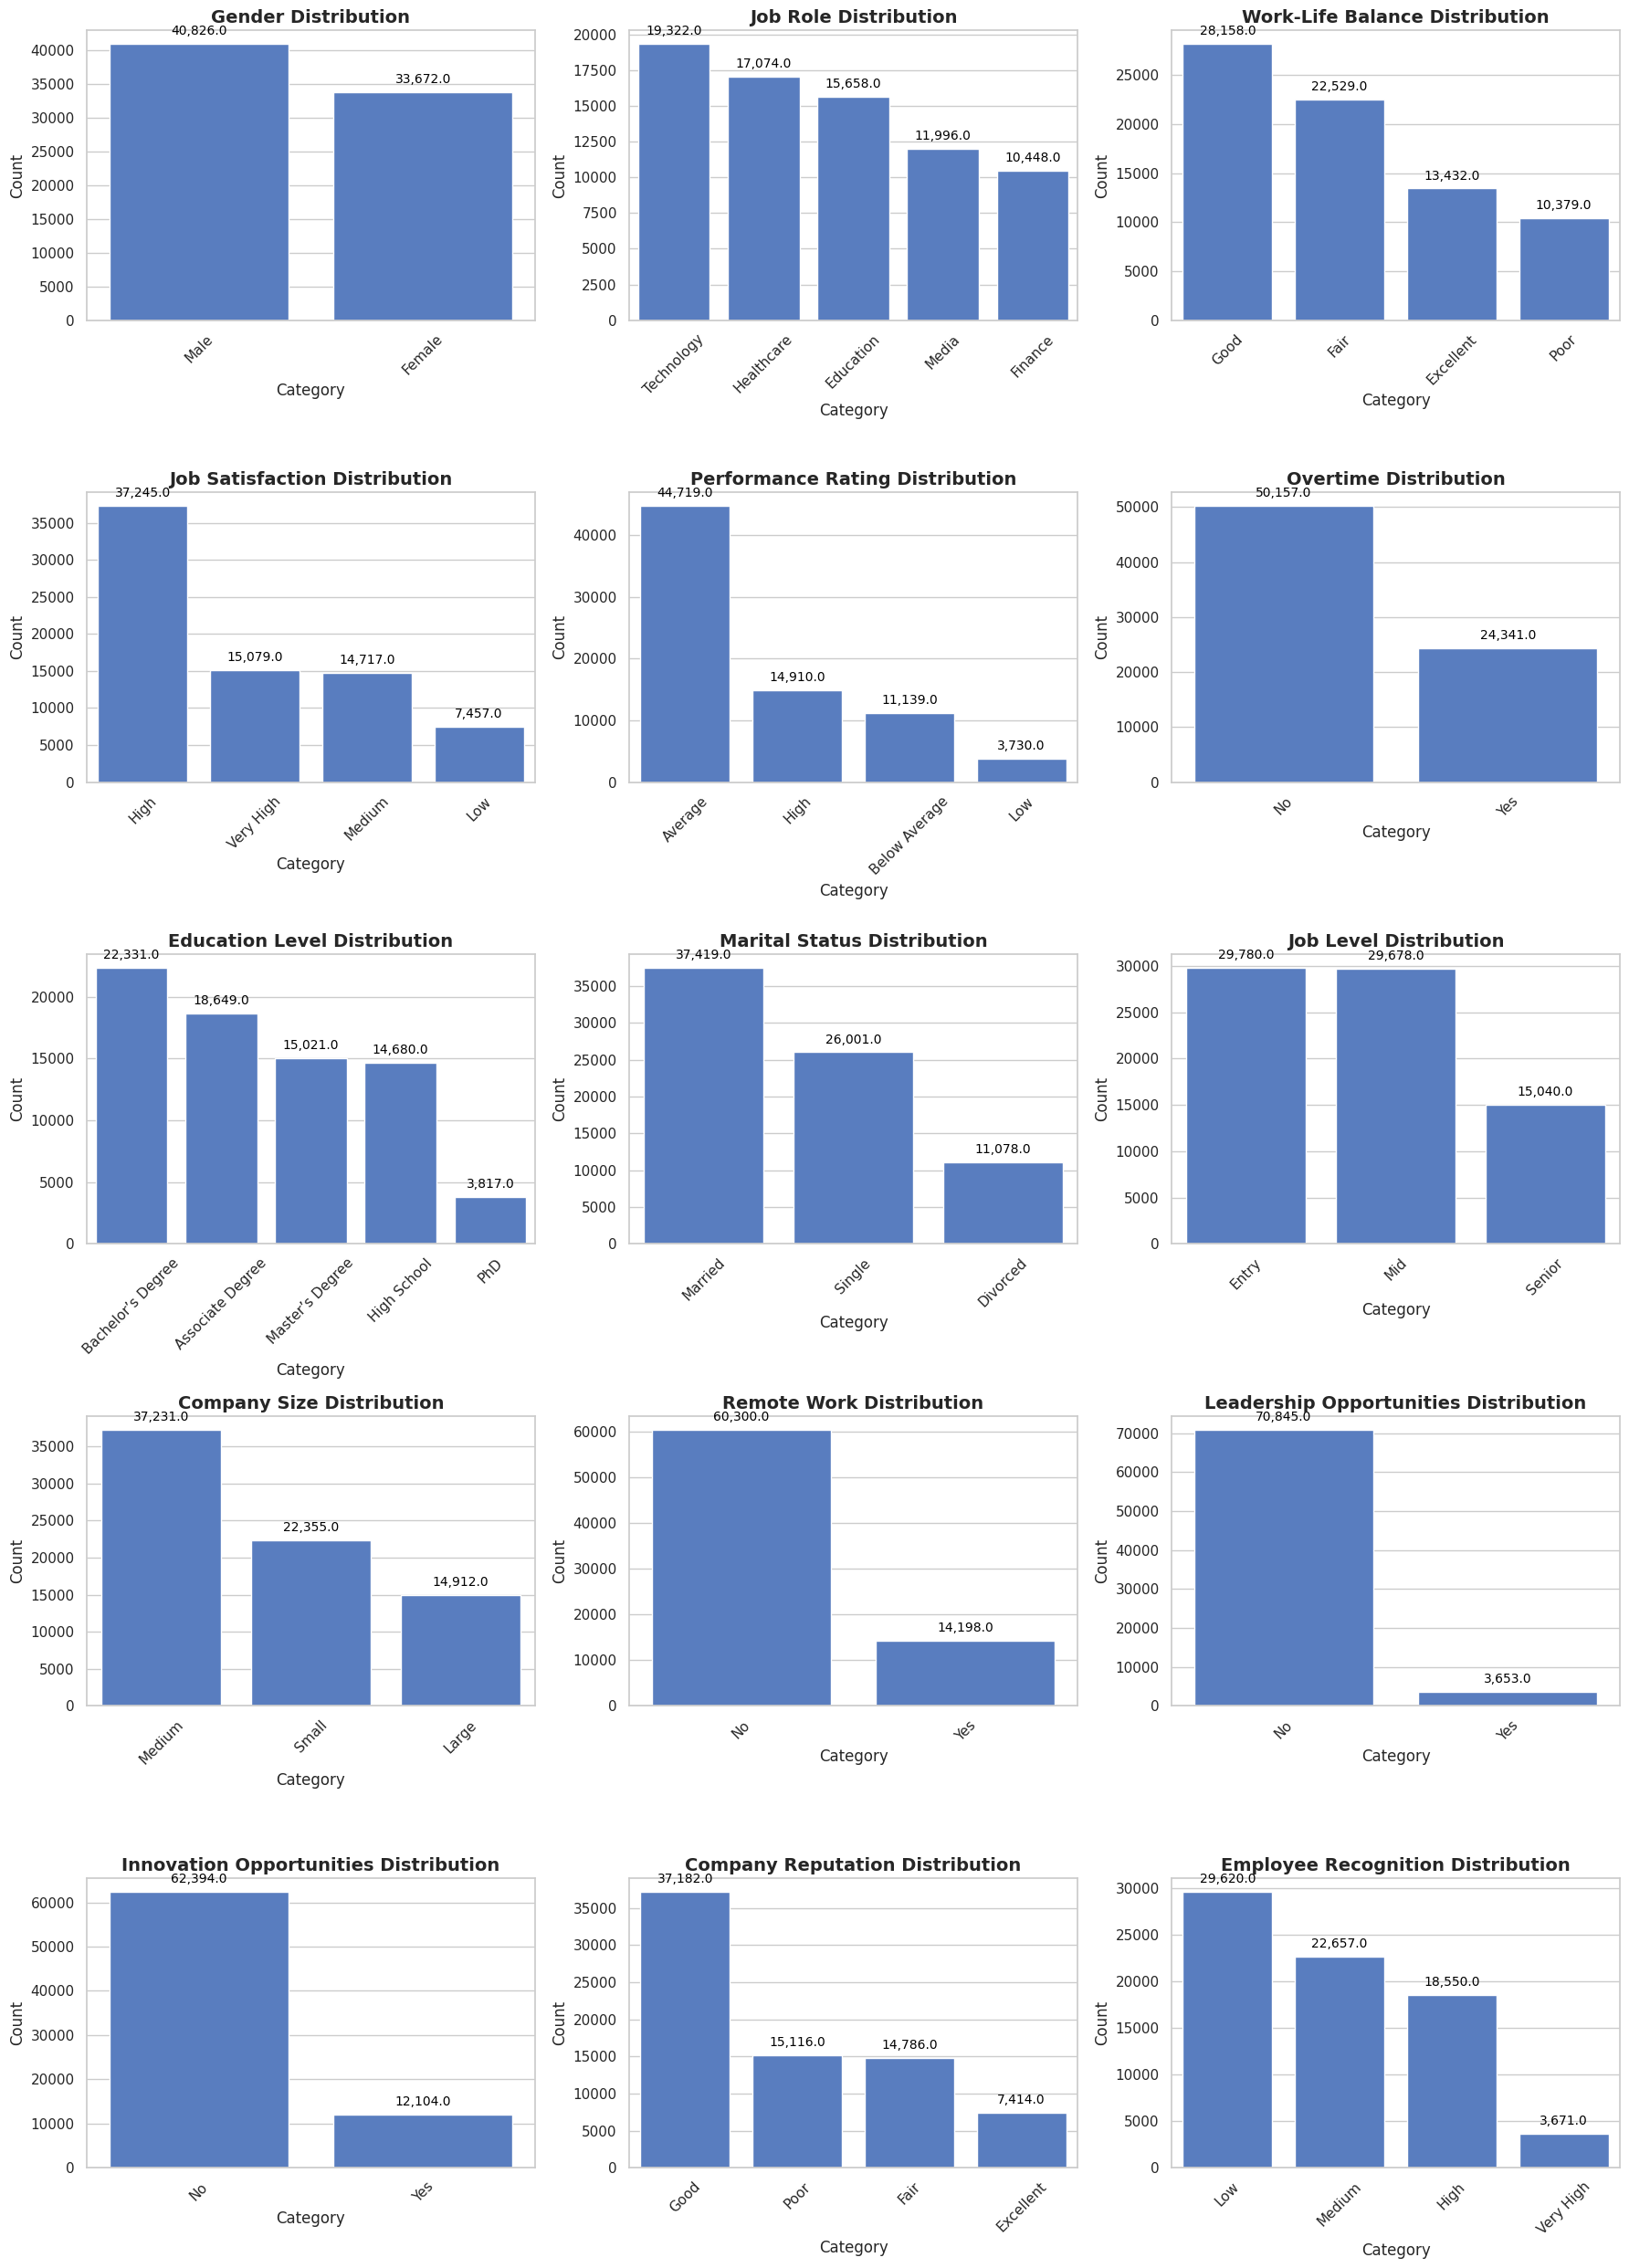

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set a professional theme and color palette
sns.set_theme(style="whitegrid", palette="muted")

# Ensure object_col is a list of categorical columns
if isinstance(object_col, list):
    object_col = df[object_col]

cat_cols = len(object_col.columns)

# Calculate rows dynamically for a neat grid
rows = math.ceil(cat_cols / 3)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(18, 5 * rows))

axes = axes.flatten()

# Iterate through categorical columns and plot
for i, col in enumerate(object_col.columns):
    ax = axes[i]
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=ax, hue=None)

    # Enhanced titles and axis labels
    ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel('Category', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    # Rotate x-axis labels for better clarity
    ax.tick_params(axis='x', rotation=45)

    # Add count labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Hide unused subplots for cleaner output
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Key Insights from Categorical Distributions:

- **Gender Distribution:**

The dataset exhibits a slight gender imbalance, with a higher proportion of males compared to females.

- **Job Role:**

The Technology and Healthcare sectors dominate, while Finance and Media roles are the least represented.

- **Work-Life Balance:**

A majority of employees rate their work-life balance as Good, while a smaller portion reports it as Poor.

- **Job Satisfaction:**

High job satisfaction is the most common, but a notable portion falls into Medium and Low satisfaction categories, suggesting areas for improvement.

- **Performance Rating:**

The majority of employees receive an Average performance rating. Very few employees are rated as Low performers.

- **Overtime:**

A substantial number of employees do not work overtime, indicating a relatively balanced workload for most employees.

- **Education Level:**

Bachelor’s Degree holders form the largest group, followed by Associate Degree and Master’s Degree. Employees with a PhD are the least common.

- **Marital Status:**

Married employees constitute the largest group, followed by single and then divorced employees.

- **Job Level:**

Entry-level and Mid-level employees dominate, while Senior-level positions are significantly fewer.
- **Company Size:**

Medium-sized companies have the highest representation, while large companies have the lowest share.

- **Remote Work:**

A large portion of employees do not work remotely, suggesting a traditional on-site working model is more common.

- **Leadership Opportunities:**

Few employees report having leadership opportunities, which could indicate a lack of growth pathways within the organization.

- **Innovation Opportunities:**

A significant majority indicate a lack of innovation opportunities, suggesting room for fostering a more innovative work environment.

- **Company Reputation:**

Good company reputation is most frequently reported, but there is a considerable portion of employees who rate it as Poor or Fair, indicating a mixed perception.

- **Employee Recognition:**

Low and Medium recognition levels dominate, with Very High recognition being rare, suggesting improvements are needed in employee reward programs

---

### Identify Outliers in the Dataset

We'll use two standard methods to detect outliers:

***Z-Score Method:*** Identifies how many standard deviations a value is from the mean.

***IQR (Interquartile Range) Method:*** Captures outliers beyond 1.5 times the interquartile range.


Detect outliers using IQR for all numerical features.

Visualize the outliers using **boxplots** for a clear understanding.

Decide whether to remove or transform the outliers.

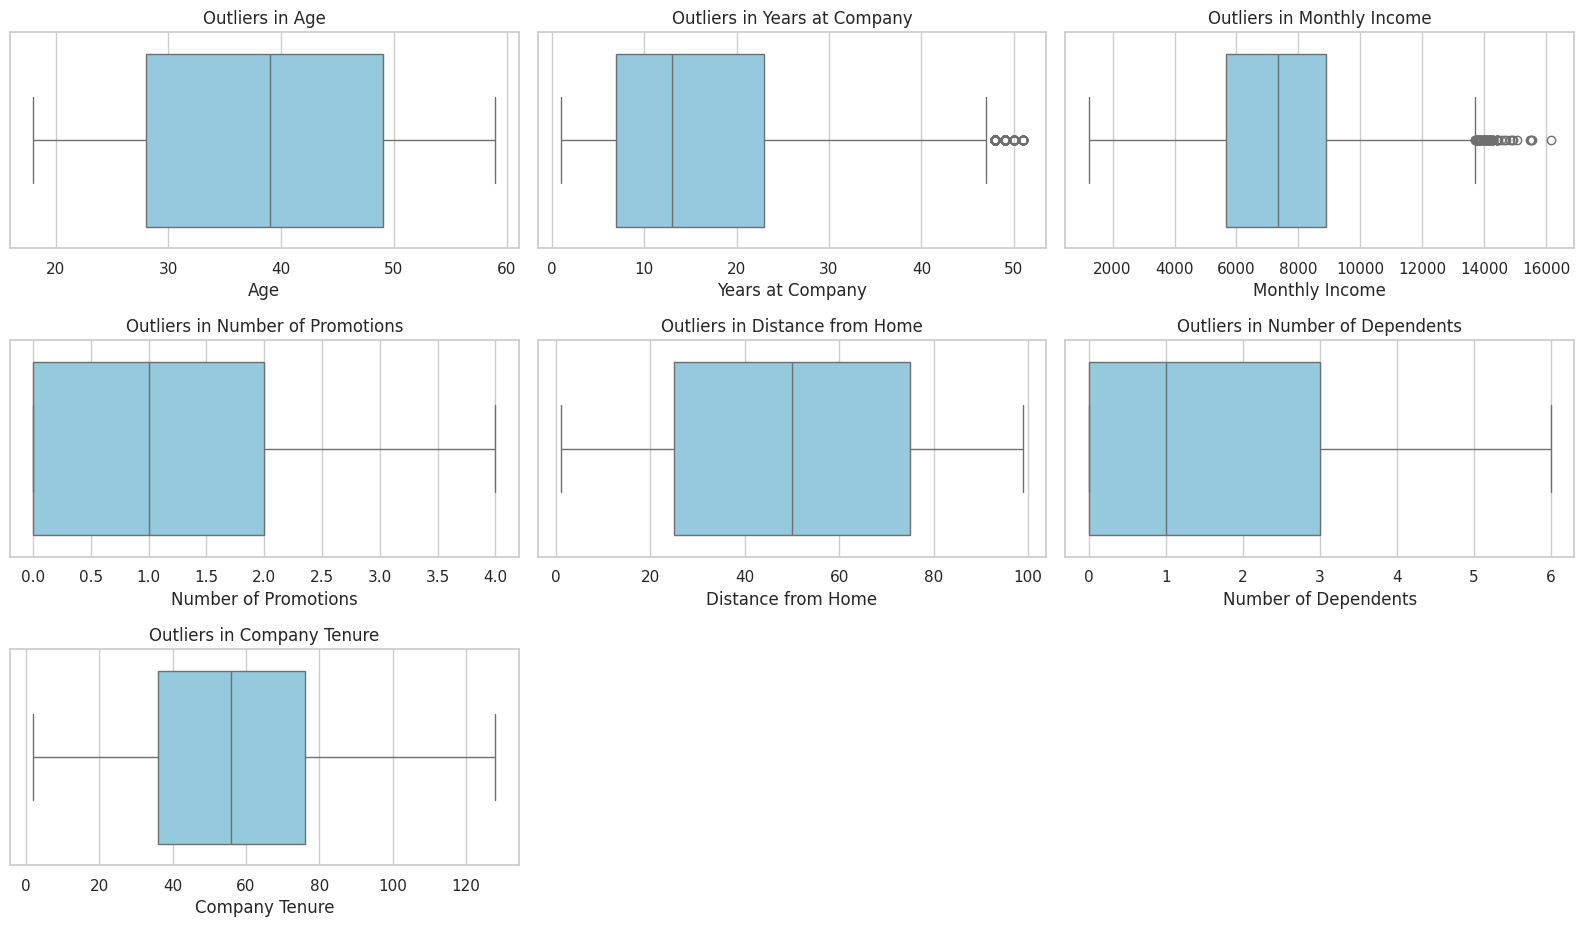

{'Age': 0,
 'Years at Company': 338,
 'Monthly Income': 65,
 'Number of Promotions': 0,
 'Distance from Home': 0,
 'Number of Dependents': 0,
 'Company Tenure': 0}

In [228]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Detect outliers
outliers = detect_outliers_iqr(df, numeric_df)

# Visualize outliers using boxplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_df, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

# Count of outliers per column
outlier_counts = {col: len(outliers[col]) for col in numeric_df}
outlier_counts


#  Key Observations from the Boxplots:

- ***Age*** –> No significant outliers.  
- ***Years at Company*** –> Some extreme values (beyond 40 years).
- ***Monthly Income*** –>Several outliers on the higher end (above ~14,000).
- ***Number of Promotions*** –>No major outliers.
- ***Distance from Home*** –>No clear outliers.  
- ***Number of Dependents*** –>No major outliers.  
- ***Company Tenure*** –>Contains extreme high values (~120).  


In [229]:
def remove_outliers_iqr(df, numeric_df):
    for col in numeric_df:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

df_cleaned = remove_outliers_iqr(df, df.select_dtypes(include=['int64', 'float64']).columns)


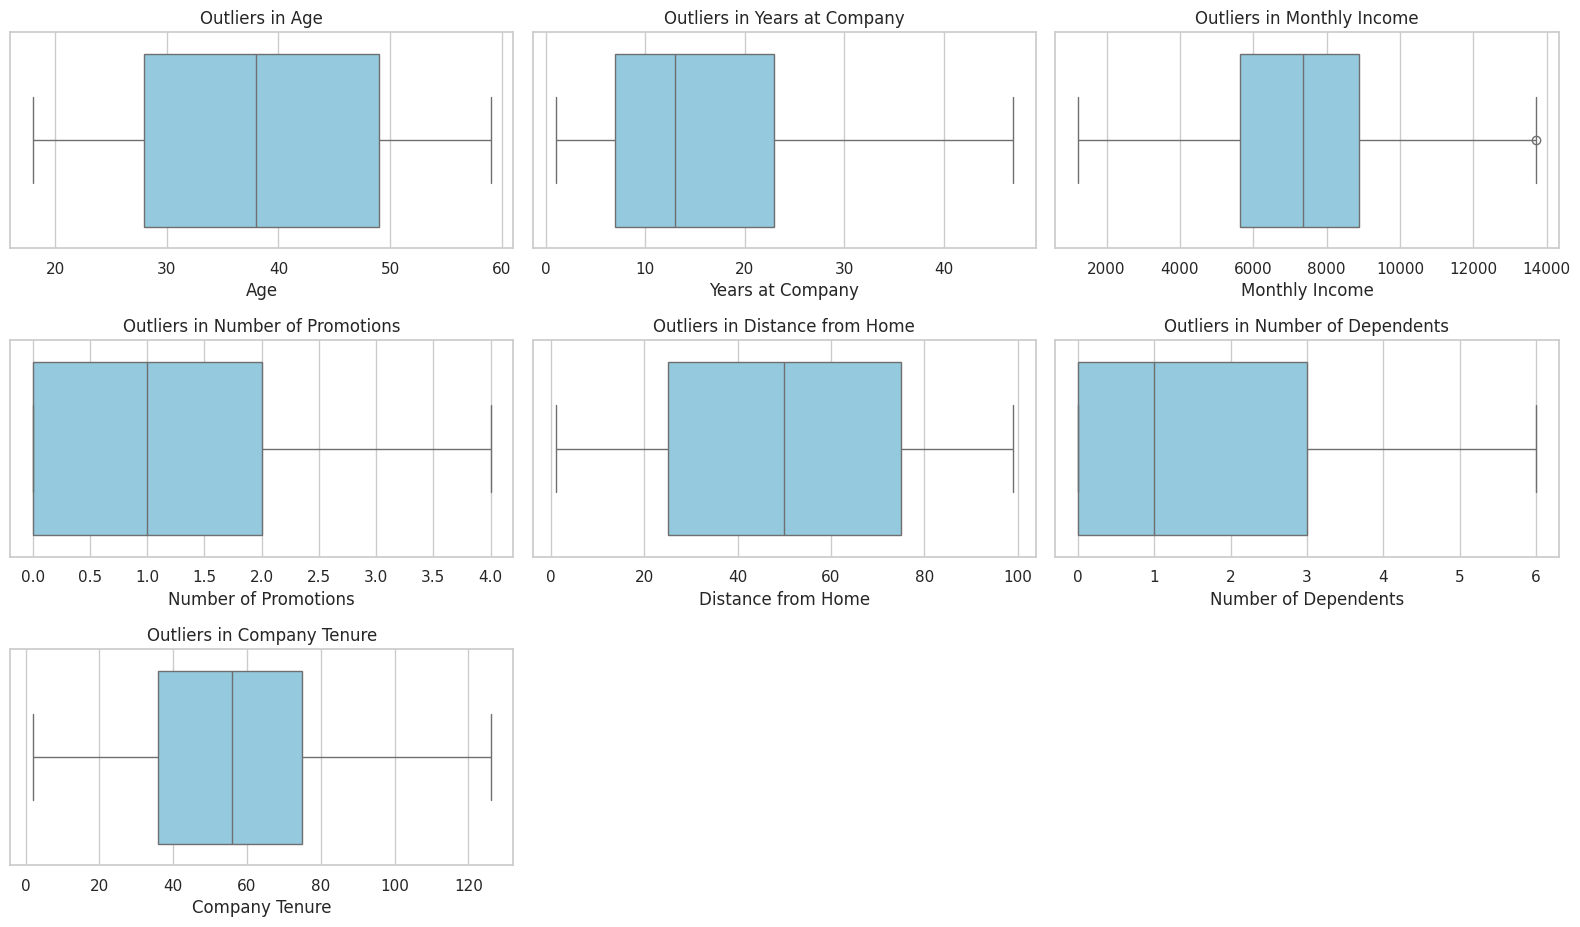

{'Age': 0,
 'Years at Company': 0,
 'Monthly Income': 1,
 'Number of Promotions': 0,
 'Distance from Home': 0,
 'Number of Dependents': 0,
 'Company Tenure': 0}

In [230]:
def detect_outliers_iqr(df_cleaned, columns):
    outliers = {}
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col]
    return outliers

# Detect outliers
outliers = detect_outliers_iqr(df_cleaned, numeric_df)

# Visualize outliers using boxplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_df, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df_cleaned[col], color='skyblue')
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()

# Count of outliers per column
outlier_counts = {col: len(outliers[col]) for col in numeric_df}
outlier_counts

In [231]:
def remove_outliers_iqr(df_cleaned, numeric_df):
    for col in numeric_df:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

df_cleaned = remove_outliers_iqr(df_cleaned, df_cleaned.select_dtypes(include=['int64', 'float64']).columns)

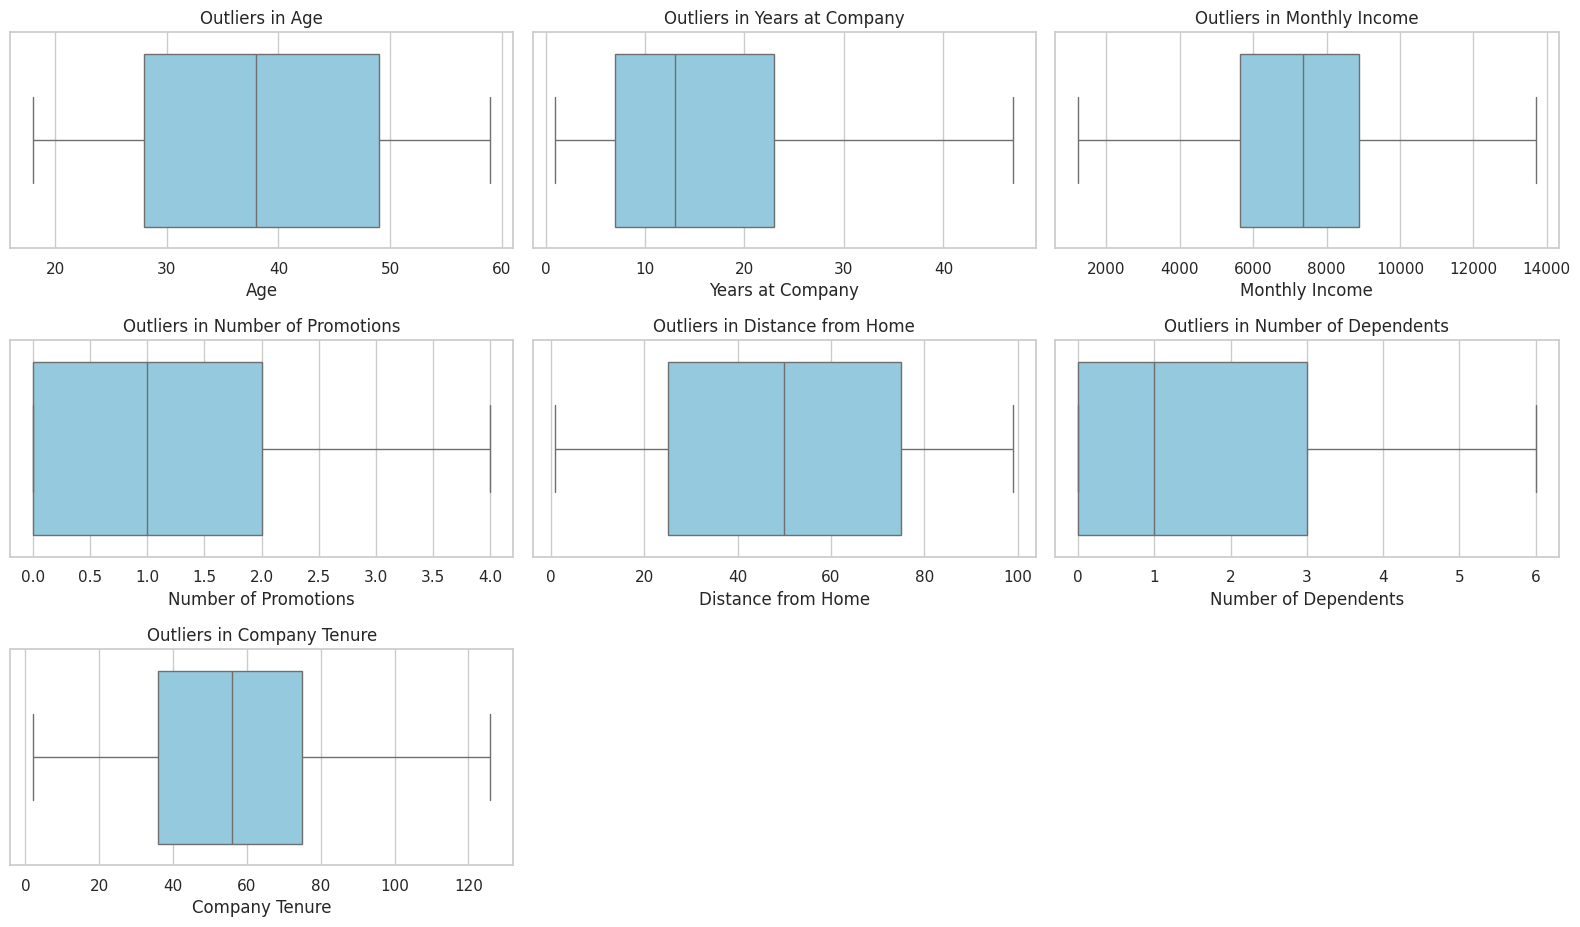

{'Age': 0,
 'Years at Company': 0,
 'Monthly Income': 0,
 'Number of Promotions': 0,
 'Distance from Home': 0,
 'Number of Dependents': 0,
 'Company Tenure': 0}

In [232]:
def detect_outliers_iqr(df_cleaned, columns):
    outliers = {}
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col]
    return outliers

# Detect outliers
outliers = detect_outliers_iqr(df_cleaned, numeric_df)

# Visualize outliers using boxplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_df, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df_cleaned[col], color='skyblue')
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

# Count of outliers per column
outlier_counts = {col: len(outliers[col]) for col in numeric_df}
outlier_counts

In [233]:
df_work = copy.deepcopy(df_cleaned)

In [234]:
df_work

Age  Gender  Years at Company    Job Role  Monthly Income  \
0       36    Male                13  Healthcare            8029   
1       35    Male                 7   Education            4563   
2       50    Male                 7   Education            5583   
3       58    Male                44       Media            5525   
4       39    Male                24   Education            4604   
...    ...     ...               ...         ...             ...   
74493   50  Female                12   Education            4414   
74494   18    Male                 4  Healthcare            8040   
74495   22  Female                14  Technology            7944   
74496   23    Male                 8   Education            2931   
74497   56    Male                19  Technology            6660   

      Work-Life Balance Job Satisfaction Performance Rating  \
0             Excellent             High            Average   
1                  Good             High            Average   
2                  Fair             High            Average   
3                  Fair        Very High               High   
4                  Good             High            Average   
...                 ...              ...                ...   
74493              Fair             High            Average   
74494              Fair             High               High   
74495              Fair             High               High   
74496              Fair        Very High            Average   
74497              Good             High            Average   

       Number of Promotions Overtime  ...  Number of Dependents Job Level  \
0                         1      Yes  ...                     1       Mid   
1                         1      Yes  ...                     4     Entry   
2                         3      Yes  ...                     2    Senior   
3                         0      Yes  ...                     4     Entry   
4                         0      Yes  ...                     6       Mid   
...                     ...      ...  ...                   ...       ...   
74493                     1      Yes  ...                     2    Senior   
74494                     3       No  ...                     0    Senior   
74495                     0      Yes  ...                     2     Entry   
74496                     0       No  ...                     0     Entry   
74497                     0      Yes  ...                     3       Mid   

      Company Size  Company Tenure Remote Work Leadership Opportunities  \
0            Large              22          No                       No   
1           Medium              27          No                       No   
2           Medium              76          No                       No   
3           Medium              96          No                       No   
4            Large              45         Yes                       No   
...            ...             ...         ...                      ...   
74493        Small              35          No                       No   
74494       Medium              73          No                       No   
74495        Small              29          No                      Yes   
74496        Large               9          No                       No   
74497       Medium              81          No                       No   

       Innovation Opportunities Company Reputation Employee Recognition  \
0                            No               Poor               Medium   
1                            No               Good                 High   
2                           Yes               Good                  Low   
3                            No               Poor                  Low   
4                            No               Good                 High   
...                         ...                ...                  ...   
74493                       Yes               Poor            Very High   
74494  

We have cleaned and Removed outliers From the data set By using **IQR** method

### Now we Have Cleaned Data Set without any Null, Missing Values OR Outliers

In [235]:
df_cleaned

Age  Gender  Years at Company    Job Role  Monthly Income  \
0       36    Male                13  Healthcare            8029   
1       35    Male                 7   Education            4563   
2       50    Male                 7   Education            5583   
3       58    Male                44       Media            5525   
4       39    Male                24   Education            4604   
...    ...     ...               ...         ...             ...   
74493   50  Female                12   Education            4414   
74494   18    Male                 4  Healthcare            8040   
74495   22  Female                14  Technology            7944   
74496   23    Male                 8   Education            2931   
74497   56    Male                19  Technology            6660   

      Work-Life Balance Job Satisfaction Performance Rating  \
0             Excellent             High            Average   
1                  Good             High            Average   
2                  Fair             High            Average   
3                  Fair        Very High               High   
4                  Good             High            Average   
...                 ...              ...                ...   
74493              Fair             High            Average   
74494              Fair             High               High   
74495              Fair             High               High   
74496              Fair        Very High            Average   
74497              Good             High            Average   

       Number of Promotions Overtime  ...  Number of Dependents Job Level  \
0                         1      Yes  ...                     1       Mid   
1                         1      Yes  ...                     4     Entry   
2                         3      Yes  ...                     2    Senior   
3                         0      Yes  ...                     4     Entry   
4                         0      Yes  ...                     6       Mid   
...                     ...      ...  ...                   ...       ...   
74493                     1      Yes  ...                     2    Senior   
74494                     3       No  ...                     0    Senior   
74495                     0      Yes  ...                     2     Entry   
74496                     0       No  ...                     0     Entry   
74497                     0      Yes  ...                     3       Mid   

      Company Size  Company Tenure Remote Work Leadership Opportunities  \
0            Large              22          No                       No   
1           Medium              27          No                       No   
2           Medium              76          No                       No   
3           Medium              96          No                       No   
4            Large              45         Yes                       No   
...            ...             ...         ...                      ...   
74493        Small              35          No                       No   
74494       Medium              73          No                       No   
74495        Small              29          No                      Yes   
74496        Large               9          No                       No   
74497       Medium              81          No                       No   

       Innovation Opportunities Company Reputation Employee Recognition  \
0                            No               Poor               Medium   
1                            No               Good                 High   
2                           Yes               Good                  Low   
3                            No               Poor                  Low   
4                            No               Good                 High   
...                         ...                ...                  ...   
74493                       Yes               Poor            Very High   
74494  

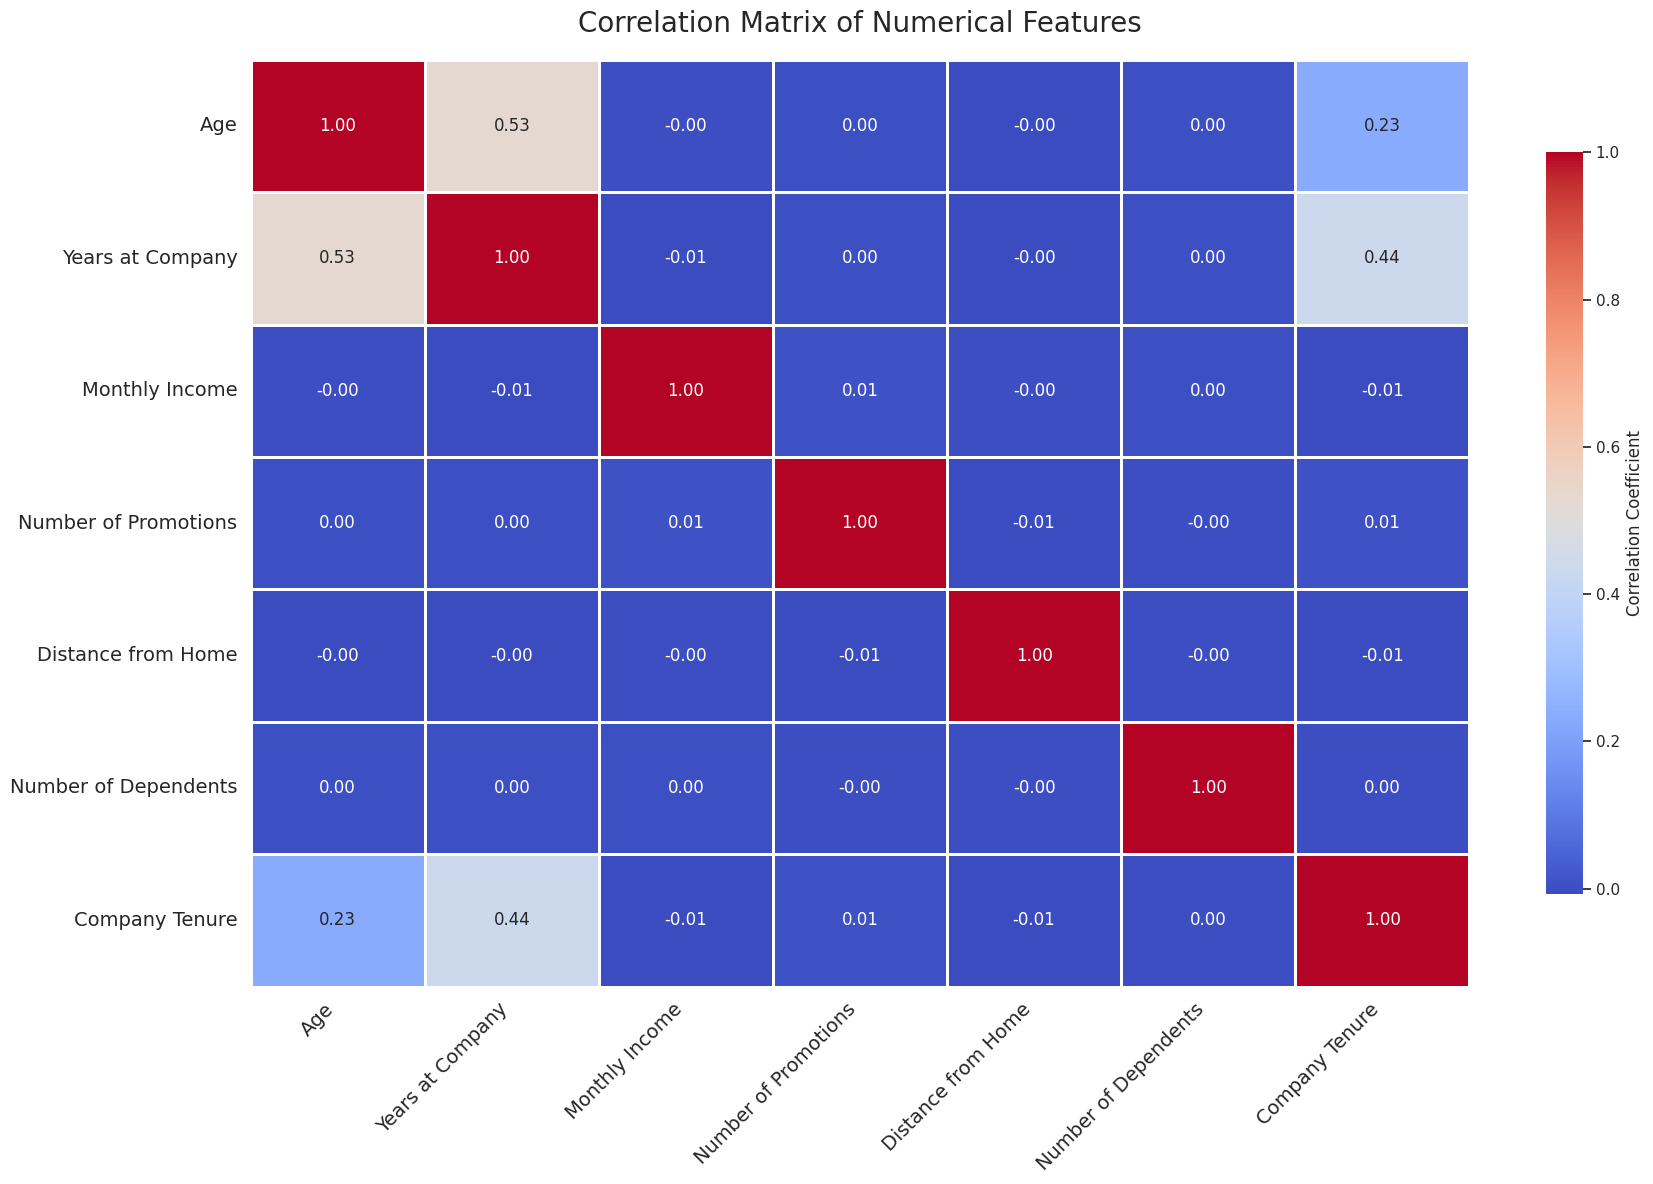

In [236]:
df_cleaned_numeric = df_cleaned.select_dtypes(include=['int64', 'float'])
correlation_matrix = df_cleaned_numeric.corr()

# Create a mask to hide the upper triangle
plt.figure(figsize=(18, 12))
plt.title("Correlation Matrix of Numerical Features", fontsize=20, pad=20)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=1, linecolor='white', cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            annot_kws={"size": 12})

# Improve the axis labels
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


### Key Insights from the Correlation Matrix
***Age vs. Years at Company:***

Positive correlation (0.53) – Older employees tend to have longer tenure.

***Years at Company vs. Company Tenure:***

Moderate correlation (0.44) – Employees who have been at the company longer have higher tenure values.

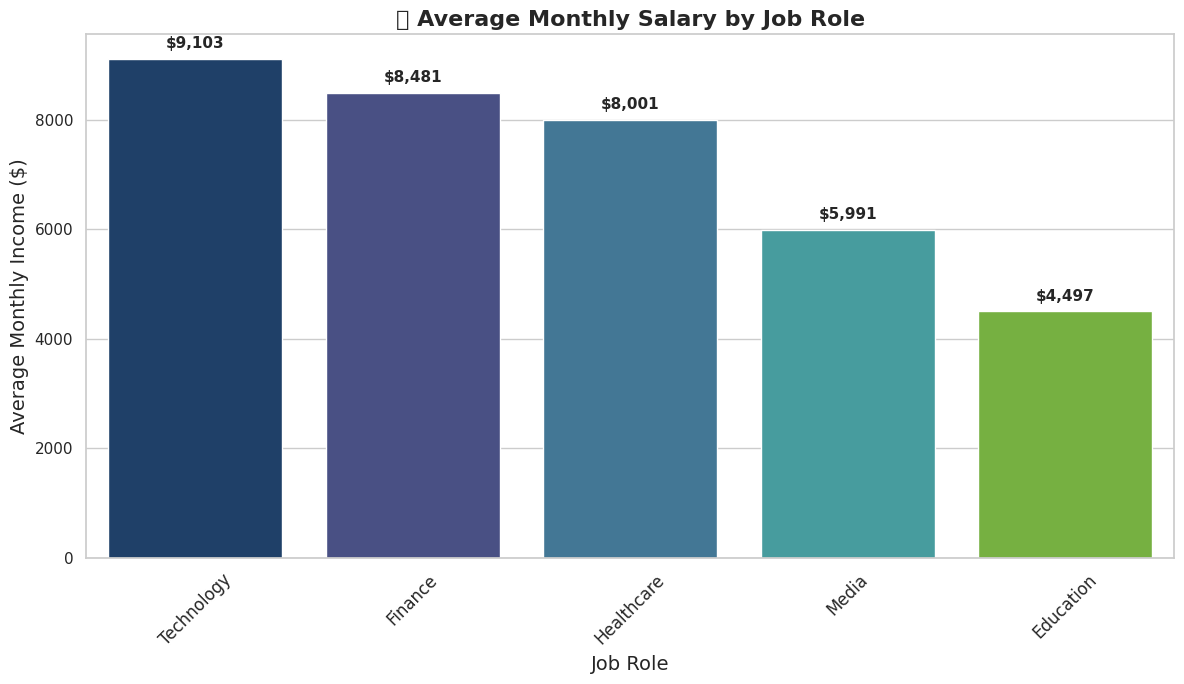

In [237]:
salary_dept = df_cleaned.groupby("Job Role")["Monthly Income"].mean().sort_values(ascending=False)

# Improved Plot Settings
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Custom color palette for better contrast
palette = sns.color_palette("mako", len(salary_dept))

# Create the bar plot
bars = sns.barplot(x=salary_dept.index, y=salary_dept.values, palette=palette)

# Add exact values on top of each bar
for bar, value in zip(bars.patches, salary_dept.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 200, f"${int(value):,}",
             ha='center', fontsize=11, fontweight='bold')

# Emphasize the highest and lowest salary
bars.patches[0].set_facecolor('#1f4068')  # Darker shade for the highest
bars.patches[-1].set_facecolor('#76b041')  # Highlight the lowest

# Enhance Labels and Title
plt.title("💼 Average Monthly Salary by Job Role", fontsize=16, fontweight='bold')
plt.ylabel("Average Monthly Income ($)", fontsize=14)
plt.xlabel("Job Role", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

***Insights from the Chart:***

- **Technology:**
 Highest average monthly income (~9,000).
- **Finance:**
Second-highest (~8,500).
- **Healthcare:** Close to Finance (~8,000).

- **Media:** Moderate (~6,000).

- **Education:** Lowest (~4,500).

---

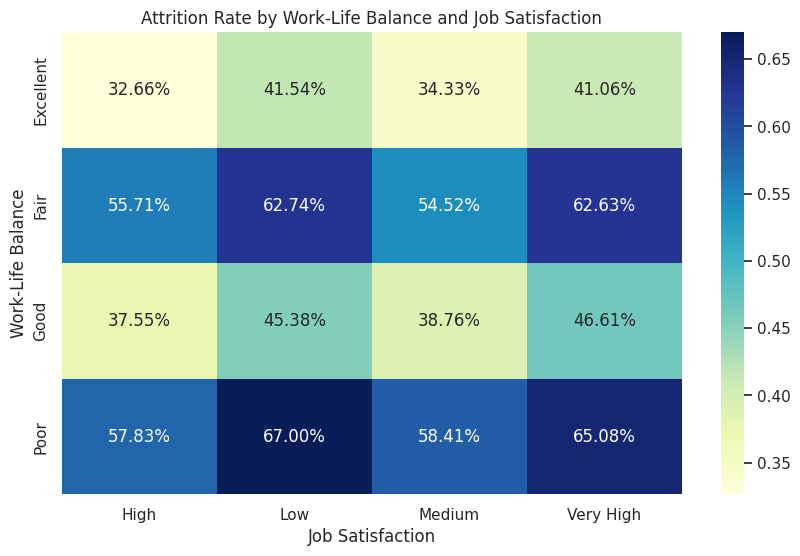

In [238]:
pivot_table = df_cleaned.pivot_table(index='Work-Life Balance', columns='Job Satisfaction', values='Attrition', aggfunc=lambda x: (x == 'Left').mean())

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2%")
plt.title('Attrition Rate by Work-Life Balance and Job Satisfaction')
plt.show()

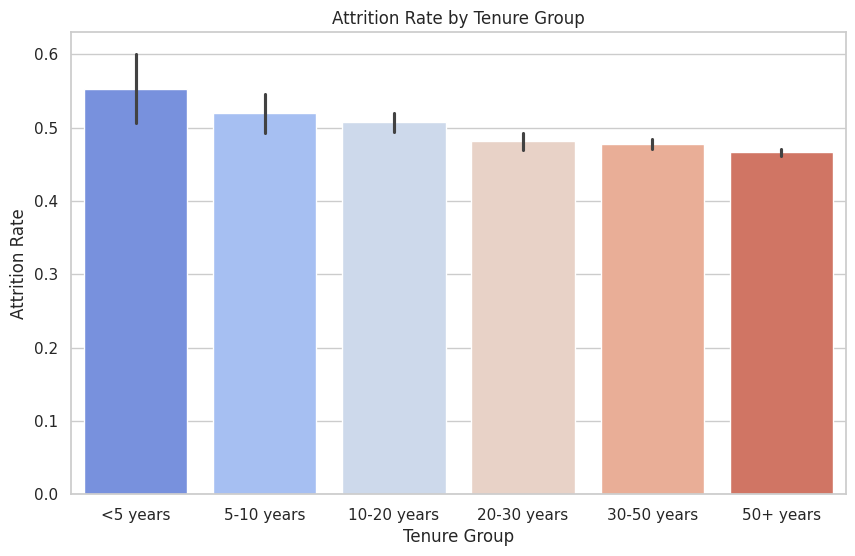

In [239]:
df_cleaned['Tenure Group'] = pd.cut(df_cleaned['Company Tenure'], bins=[0, 5, 10, 20, 30, 50, 130], labels=['<5 years', '5-10 years', '10-20 years', '20-30 years', '30-50 years', '50+ years'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure Group', y=(df_cleaned['Attrition'] == 'Left').astype(int), data=df_cleaned, estimator=np.mean, palette='coolwarm')
plt.title('Attrition Rate by Tenure Group')
plt.ylabel('Attrition Rate')
plt.show()


### Insights from the Attrition Rate by Tenure Group Chart
Higher Attrition Among New Employees:

Employees with less than 5 years of tenure show the highest attrition rate (~0.55).

**Insight:** New hires are more likely to leave, possibly due to unmet expectations or lack of engagement in the early stages.
Gradual Decline in Attrition:

As tenure increases, the attrition rate steadily decreases across the groups. Employees with 50+ years of tenure have the lowest attrition rate (~0.45).

**Insight:** Employees who stay longer are more likely to remain, indicating increased loyalty with time.
Critical Drop After 10 Years:

There is a noticeable drop in attrition after the 10-year mark, suggesting a point where employees become more invested.

**Insight:** Retention strategies should focus on supporting employees during their first decade to improve long-term loyalty.

---

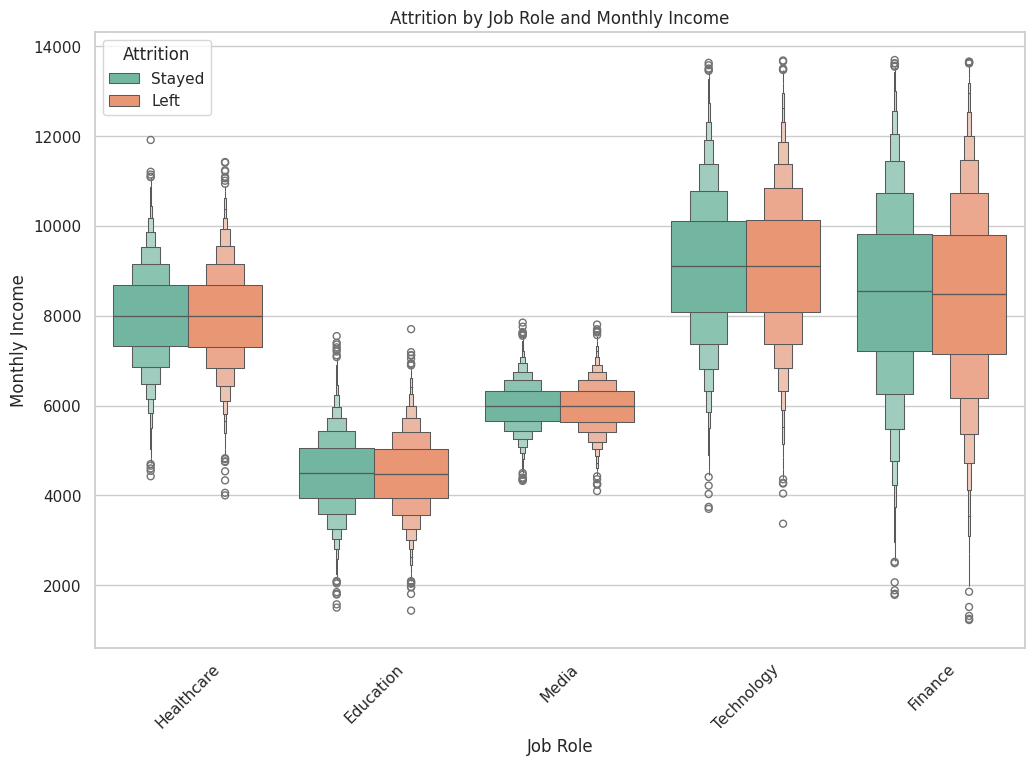

In [240]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x='Job Role', y='Monthly Income', hue='Attrition', data=df_cleaned, palette='Set2')
plt.xticks(rotation=45)
plt.title('Attrition by Job Role and Monthly Income')
plt.show()


### Attrition by Job Role and Monthly Income (Boxen Plot):

- Healthcare and Education: Employees in these fields have lower median incomes and show moderate attrition. Attrition levels are similar across income groups.

- Media: Employees in media roles have a narrower income range, and attrition appears to be consistent regardless of salary.

- Technology and Finance: These sectors have the widest income range. Interestingly, higher earners in these fields are not immune to attrition, indicating that salary alone does not prevent employees from leaving.

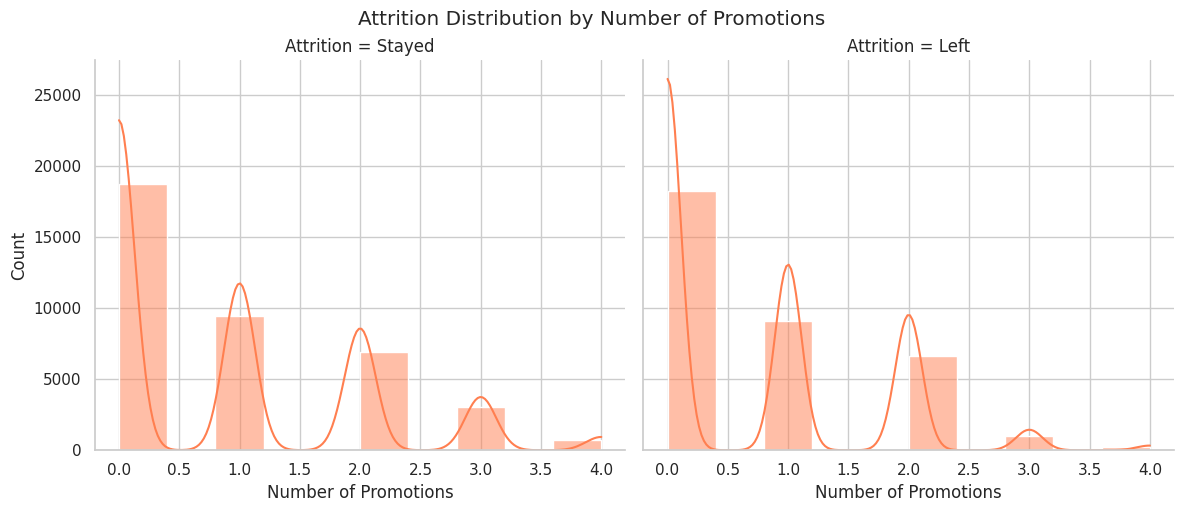

In [241]:
g = sns.FacetGrid(df_cleaned, col='Attrition', height=5, aspect=1.2)
g.map(sns.histplot, 'Number of Promotions', kde=True, bins=10, color='coral')
plt.suptitle('Attrition Distribution by Number of Promotions', y=1.02)
plt.show()


### Attrition Distribution by Number of Promotions:

- Both Groups (Stayed vs. Left): A significant proportion of employees who left had zero promotions, indicating a potential lack of career advancement as a driver of attrition.

- Higher Promotions (3-4): Few employees in either group had three or more promotions, suggesting that those who advance are more likely to stay, although there are still instances of attrition at this level.

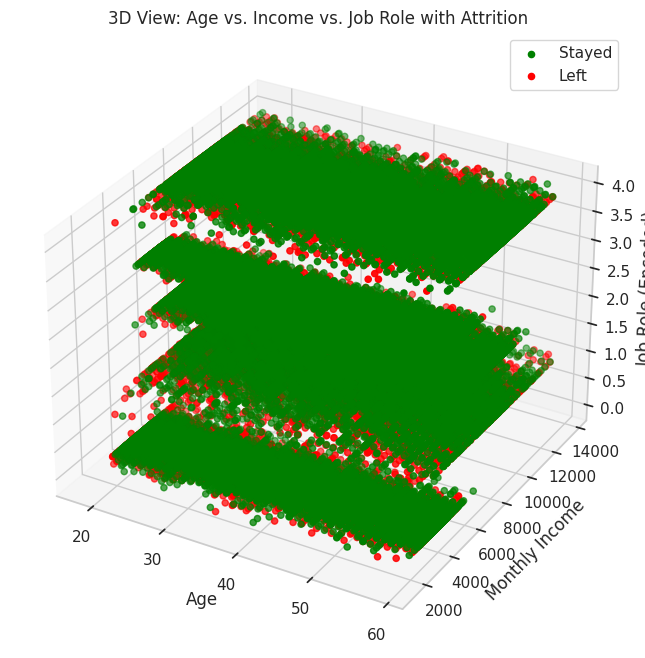

In [242]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = {'Left': 'red', 'Stayed': 'green'}

# Convert 'Job Role' to numerical representation using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['Job Role Encoded'] = le.fit_transform(df_cleaned['Job Role'])

for attrition_status in df_cleaned['Attrition'].unique():
    subset = df_cleaned[df_cleaned['Attrition'] == attrition_status]
    # Use the encoded 'Job Role' for the z-axis
    ax.scatter(subset['Age'], subset['Monthly Income'], subset['Job Role Encoded'], c=colors[attrition_status], label=attrition_status)

ax.set_xlabel('Age')
ax.set_ylabel('Monthly Income')
ax.set_zlabel('Job Role (Encoded)') # Update z-axis label
plt.title('3D View: Age vs. Income vs. Job Role with Attrition')
plt.legend()
plt.show()

### Insights from the 3D Chart (Age vs. Income vs. Job Role with Attrition)

- Attrition Across Age Groups:

Employees across all age ranges show attrition, but there is a slight concentration of red points (left) at younger ages (20-35).

**Insight:** Younger employees may be more likely to leave, possibly due to seeking better opportunities or dissatisfaction with early-career growth.
Income and Attrition Relationship:

A significant number of red points are clustered at lower monthly incomes
(below 6000).

**Insight:** Lower income levels are correlated with higher attrition, suggesting that competitive salaries may reduce turnover.
Job Role and Attrition:

Attrition occurs across all job roles (indicated by the layers), but some roles (likely lower in the vertical axis) seem to have a higher concentration of red points.

**Insight:** Certain job roles, especially at lower levels, may experience higher attrition. More analysis is needed to identify the most vulnerable roles.
High-Income Stability:

Employees with monthly incomes above 10,000 show fewer red points, meaning they are more likely to stay.

**Insight:** Higher compensation may increase employee retention.

- Recommendations:
Focus on younger employees—implement mentorship programs and career growth initiatives to retain them.
Adjust compensation policies—increase salaries in job roles where lower income correlates with higher attrition.
Target high-risk job roles—improve working conditions and offer more career advancement opportunities.
Personalized retention strategies—for higher earners, maintain incentives and leadership opportunities to ensure long-term engagement

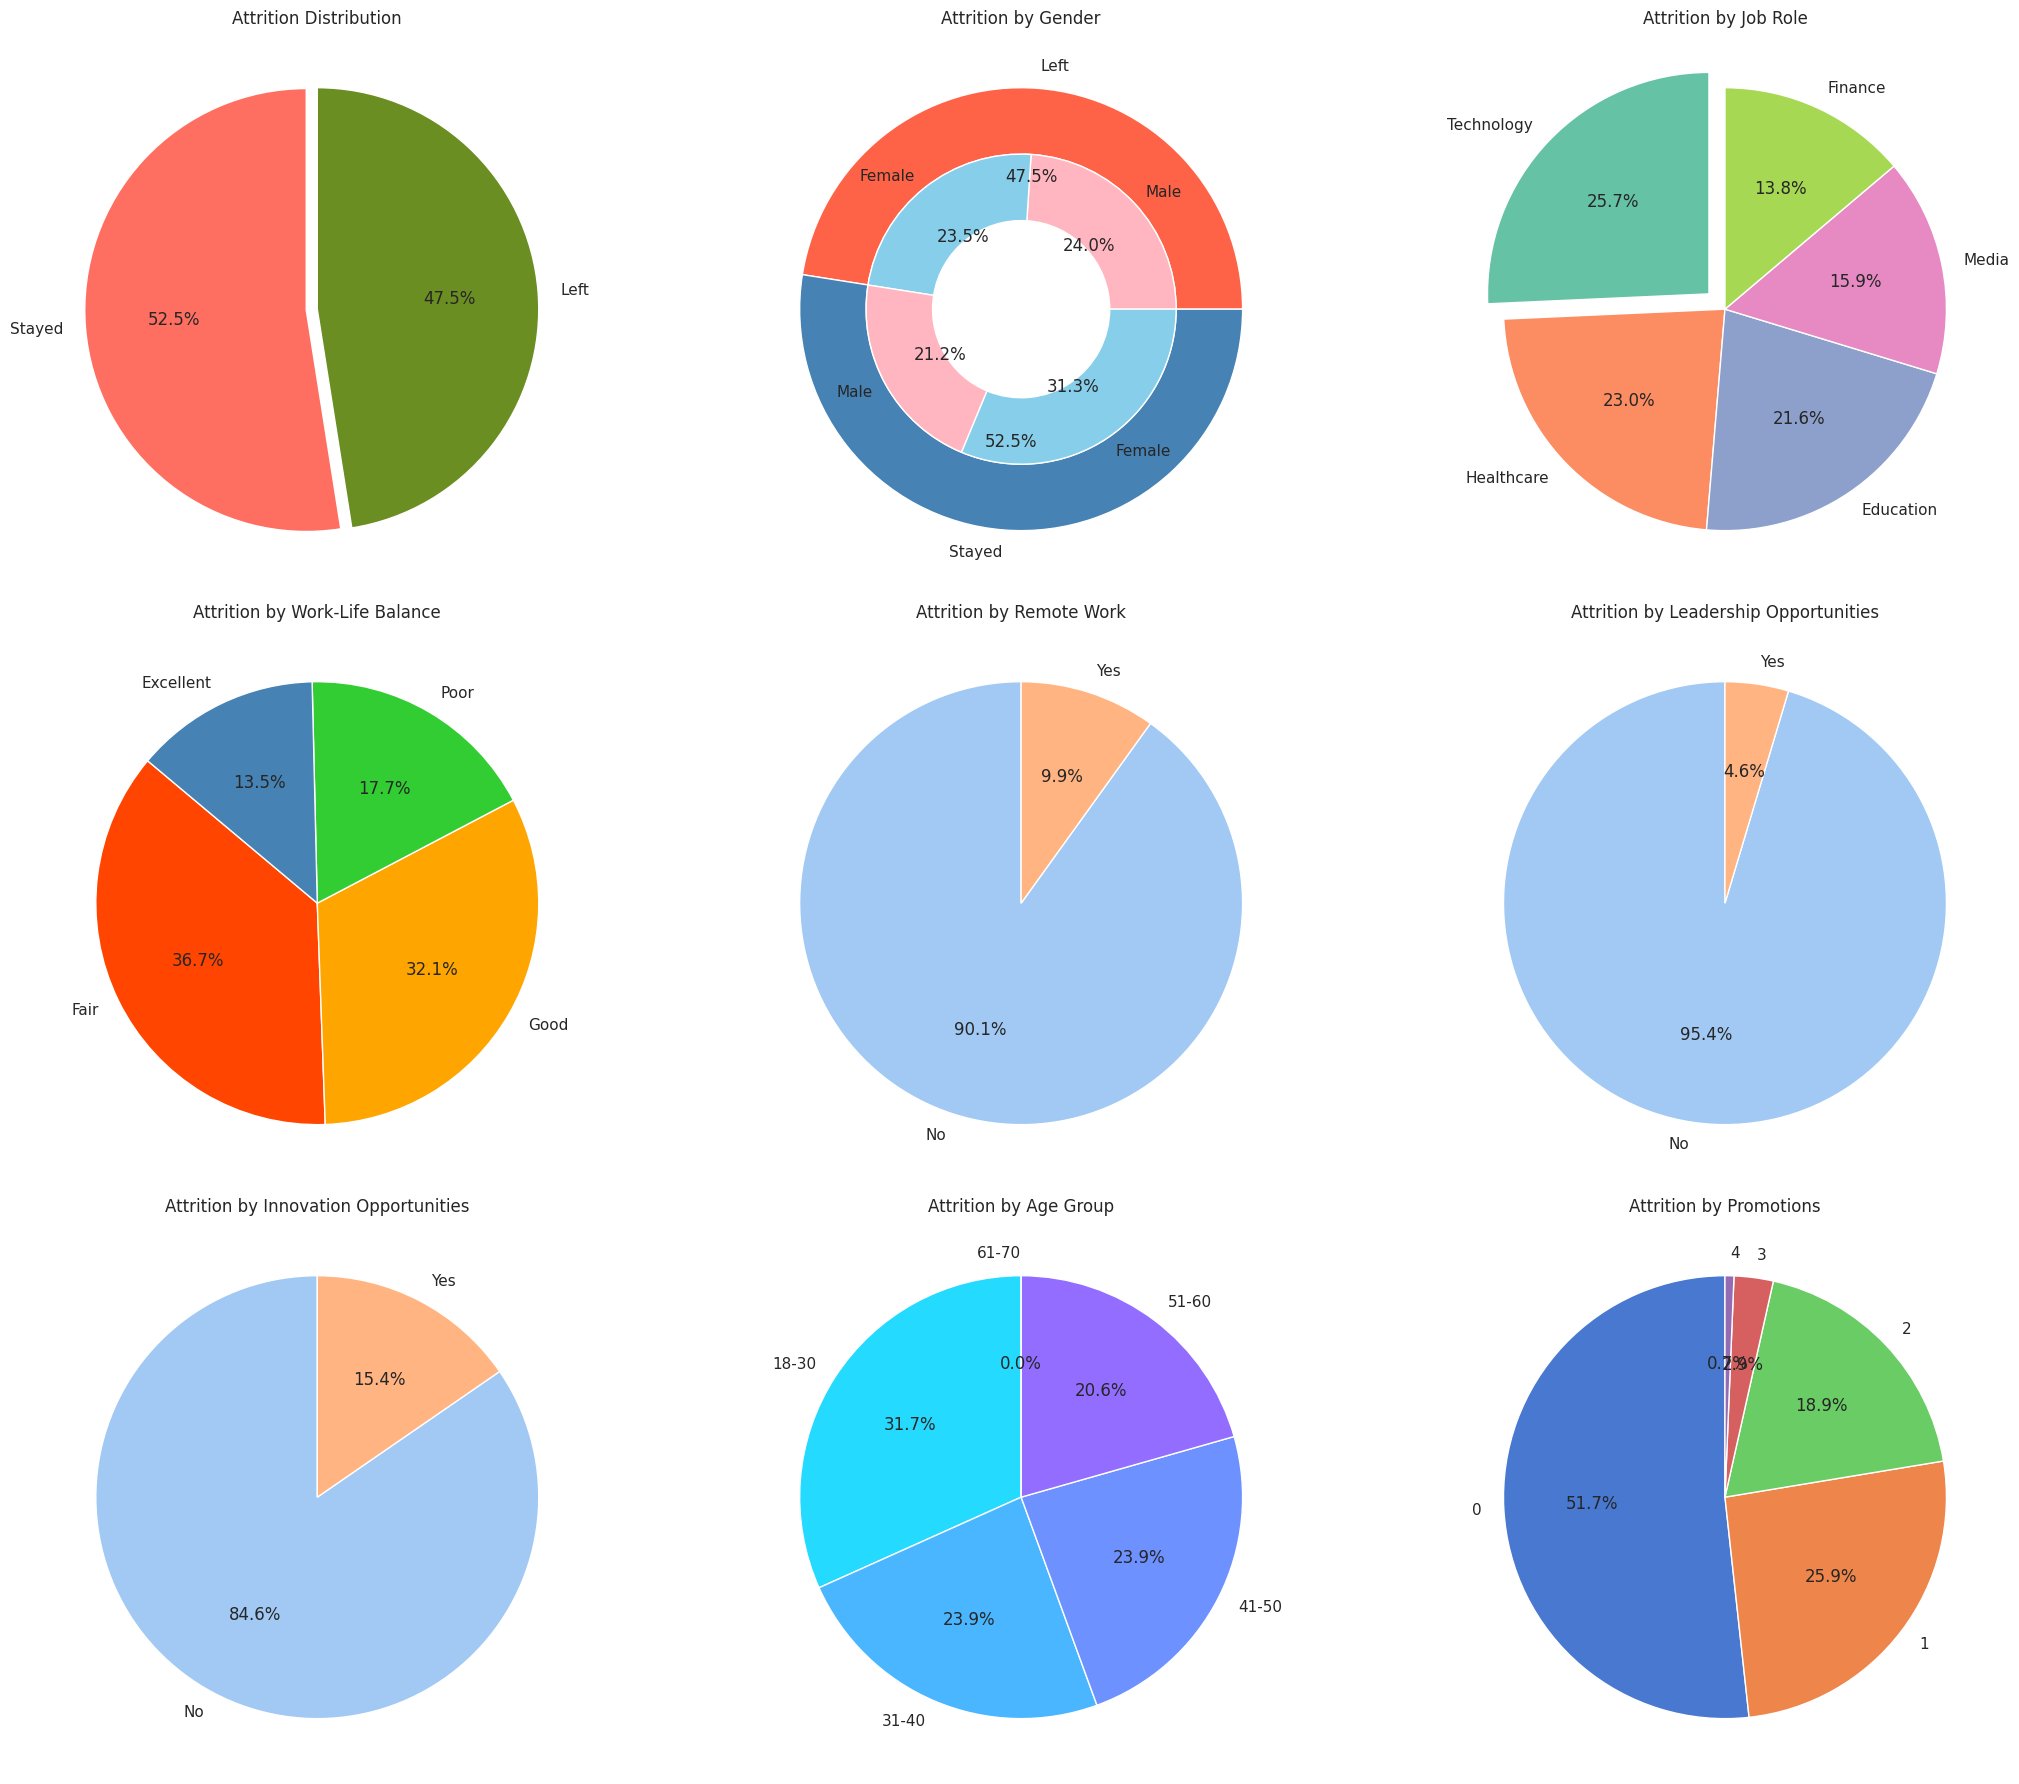

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the plot style is clean
sns.set_style('whitegrid')

# Create Age Group for segmentation
df_cleaned['Age Group'] = pd.cut(df_cleaned['Age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'])

# Define binary features for comparison
binary_features = ['Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']

# Initialize the figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(22, 18))
axes = axes.flatten()

# 1. Attrition Distribution
attrition_counts = df_cleaned['Attrition'].value_counts()
axes[0].pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', colors=['#FF6F61', '#6B8E23'], startangle=90, explode=(0.05, 0))
axes[0].set_title('Attrition Distribution')

# 2. Attrition by Gender (Donut Chart)
attrition_gender = df_cleaned.groupby('Attrition')['Gender'].value_counts().unstack()
outer_colors = ['#FF6347', '#4682B4']
inner_colors = ['#FFB6C1', '#87CEEB']
axes[1].pie(attrition_gender.sum(axis=1), labels=attrition_gender.index, radius=1, colors=outer_colors, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
axes[1].pie(attrition_gender.values.flatten(), labels=['Male', 'Female'] * 2, radius=0.7, colors=inner_colors, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
axes[1].set_title('Attrition by Gender')

# 3. Attrition by Job Role (Exploding Pie Chart)
job_role_attrition = df_cleaned[df_cleaned['Attrition'] == 'Left']['Job Role'].value_counts()
explode = [0.1 if role == job_role_attrition.idxmax() else 0 for role in job_role_attrition.index]
axes[2].pie(job_role_attrition, labels=job_role_attrition.index, autopct='%1.1f%%', startangle=90, explode=explode, colors=sns.color_palette('Set2'))
axes[2].set_title('Attrition by Job Role')

# 4. Attrition by Work-Life Balance
wlb_attrition = df_cleaned[df_cleaned['Attrition'] == 'Left']['Work-Life Balance'].value_counts()
axes[3].pie(wlb_attrition, labels=wlb_attrition.index, autopct='%1.1f%%', startangle=140, colors=['#FF4500', '#FFA500', '#32CD32', '#4682B4'])
axes[3].set_title('Attrition by Work-Life Balance')

# 5. Attrition by Binary Features (Remote Work, Leadership, Innovation)
for i, feature in enumerate(binary_features):
    feature_counts = df_cleaned[df_cleaned['Attrition'] == 'Left'][feature].value_counts()
    axes[4 + i].pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[4 + i].set_title(f'Attrition by {feature}')

# 6. Attrition by Age Group
age_group_attrition = df_cleaned[df_cleaned['Attrition'] == 'Left']['Age Group'].value_counts()
axes[7].pie(age_group_attrition, labels=age_group_attrition.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('cool'))
axes[7].set_title('Attrition by Age Group')

# 7. Attrition by Promotions
promotions_attrition = df_cleaned[df_cleaned['Attrition'] == 'Left']['Number of Promotions'].value_counts()
axes[8].pie(promotions_attrition, labels=promotions_attrition.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
axes[8].set_title('Attrition by Promotions')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### Insights from the Attrition Analysis Pi Charts
1. Attrition Distribution

47.5% of employees left the company, indicating a significant attrition rate.
This suggests underlying issues requiring further analysis and intervention to improve retention.

2. Attrition by Gender

Male and female employees leave at similar rates (~47.5%), meaning gender does not significantly impact attrition.
Both groups require equal focus in retention efforts.

3. Attrition by Job Role

Healthcare (23.0%) and Technology (25.7%) exhibit the highest attrition rates.
Finance (13.8%) has the lowest attrition rate, which may suggest better job satisfaction or stability.

Action: Prioritize improving job satisfaction and working conditions in
Healthcare and Technology roles.

4. Attrition by Work-Life Balance

Employees reporting "Fair" (36.7%) and "Good" (32.1%) work-life balance represent the majority of those leaving.
Even those with a "Good" work-life balance are leaving, indicating potential dissatisfaction beyond work hours.

Action: Reevaluate and improve work-life balance programs to better align with employee expectations.

5. Attrition by Remote Work

90.1% of employees who left did not have remote work options.

Action: Consider offering remote or hybrid work models to enhance flexibility and reduce attrition.

6. Attrition by Leadership Opportunities

95.4% of employees who left reported having no leadership opportunities.

Action: Introduce leadership development programs and provide clear promotion pathways to improve career progression.

7. Attrition by Innovation Opportunities

84.6% of employees who left had no access to innovation opportunities.

Action: Encourage innovation by fostering a culture that allows employees to contribute ideas and participate in new initiatives.

8. Attrition by Age Group

The 31-40 age group (31.7%) shows the highest attrition, followed by the 41-50 group (23.9%).

Action: Implement age-specific retention strategies, such as offering career growth for mid-level employees.

9. Attrition by Promotions

51.7% of employees who left never received a promotion.

Action: Ensure transparent promotion processes and provide clear pathways for career advancement.
Overall Recommendations
Improve work-life balance and offer flexible work options.
Enhance career growth through leadership and promotion opportunities.
Focus on retaining employees in high-turnover job roles, especially in Healthcare and Technology.
Tailor retention strategies to mid-career professionals who are most likely to leave.
Encourage a culture of innovation and employee engagement

---

In [244]:


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


if 'Date' in df_cleaned.columns:
    churn_over_time = df_cleaned.groupby('Date')['Attrition'].apply(lambda x: (x == 'Left').mean()).reset_index()
    fig = px.line(churn_over_time, x='Date', y='Attrition', title='Churn Rate Over Time', markers=True)
    fig.update_layout(xaxis_title='Date', yaxis_title='Churn Rate', yaxis_tickformat=".0%")
    fig.show()


# 2. Churn Rate by Feature (Bar Chart) - Example
# Example: Churn rate by 'Job Role'
churn_by_role = df_cleaned.groupby('Job Role')['Attrition'].apply(lambda x: (x == 'Left').mean()).sort_values(ascending=False)
fig = px.bar(churn_by_role, x=churn_by_role.index, y=churn_by_role.values, title='Churn Rate by Job Role')
fig.update_layout(xaxis_title='Job Role', yaxis_title='Churn Rate', yaxis_tickformat=".0%")
fig.show()


# 3. Churn Heatmap (Heatmap) - Example
# Heatmap of churn rates by combinations of features
# Example: 'Job Satisfaction' and 'Work-Life Balance'
pivot_table = df_cleaned.pivot_table(index='Job Satisfaction', columns='Work-Life Balance', values='Attrition', aggfunc=lambda x: (x == 'Left').mean())
fig = px.imshow(pivot_table, labels=dict(x="Work-Life Balance", y="Job Satisfaction", color="Churn Rate"),
                 x=pivot_table.columns, y=pivot_table.index,
                 color_continuous_scale='RdYlGn_r', title='Churn Rate Heatmap')  # Reverse color scale
fig.update_layout(yaxis_autorange='reversed')
fig.show()


# 4. Interactive 3D Scatter Plot
# Example: Age, Monthly Income, and Years at Company with Attrition as color
fig = px.scatter_3d(df_cleaned, x='Age', y='Monthly Income', z='Company Tenure', color='Attrition',
                    title='Churn Analysis (3D Scatter)', hover_data=['Job Role'])
fig.show()


# Create a dashboard with multiple plots
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"type": "xy"}, {"type": "xy"}],
                           [{"type": "xy"}, {"type": "scene"}]],  # 'scene' for 3D
                    subplot_titles=('Churn by Role', 'Churn Over Time','Churn Heatmap', '3D Churn Scatter'))

fig.add_trace(go.Bar(x=churn_by_role.index, y=churn_by_role.values), row=1, col=1)
if 'Date' in df_cleaned.columns:
    fig.add_trace(go.Scatter(x=churn_over_time['Date'], y=churn_over_time['Attrition']), row=1, col=2)

fig.add_trace(go.Heatmap(z=pivot_table.values, x=pivot_table.columns, y=pivot_table.index), row=2, col=1)
fig.add_trace(go.Scatter3d(x=df_cleaned['Age'], y=df_cleaned['Monthly Income'], z=df_cleaned['Company Tenure'],
                         mode='markers', marker=dict(color=df_cleaned['Attrition'].map({'Left':'red', 'Stayed':'green'}))), row=2, col=2)


fig.update_layout(height=800, width=1000, title_text="Interactive Churn Dashboard")
fig.show()



---

# Statistical Tests

In [245]:

from scipy import stats

# Example: Perform a t-test on 'Monthly Income' for two groups ('Attrition' == 'Left' and 'Attrition' == 'Stayed')
group1 = df_cleaned[df_cleaned['Attrition'] == 'Left']['Monthly Income']
group2 = df_cleaned[df_cleaned['Attrition'] == 'Stayed']['Monthly Income']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("There is a statistically significant difference in monthly income between the two groups.")
else:
    print("There is no statistically significant difference in monthly income between the two groups.")


T-statistic: -3.0308917683284466
P-value: 0.0024391676490488055
There is a statistically significant difference in monthly income between the two groups.


In [246]:
# Assuming 'Years at Company' is your continuous variable and 'Job Role' is your categorical variable with more than 2 levels.


# Group data by 'Job Role'
groups = df_cleaned.groupby('Job Role')['Years at Company'].apply(list)

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*groups)

print(f"\nANOVA test for Years at Company across different Job Roles:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05

if p_value < alpha:
    print("There is a statistically significant difference in 'Years at Company' between at least two job roles.")
else:
    print("There is no statistically significant difference in 'Years at Company' between job roles.")



ANOVA test for Years at Company across different Job Roles:
F-statistic: 0.3866242581573513
P-value: 0.818373566503652
There is no statistically significant difference in 'Years at Company' between job roles.


In [247]:
# prompt: make more statistical tests for deeper analysis

from scipy.stats import chi2_contingency, mannwhitneyu

# ... (Your existing code) ...

# Example: Perform a chi-squared test on categorical variables
contingency_table = pd.crosstab(df_cleaned['Attrition'], df_cleaned['Job Role'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared test for Attrition vs. Job Role:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("There is a statistically significant association between Attrition and Job Role.")
else:
    print("There is no statistically significant association between Attrition and Job Role.")


# Example: Mann-Whitney U test for 'Years at Company'
group1_years = df_cleaned[df_cleaned['Attrition'] == 'Left']['Years at Company']
group2_years = df_cleaned[df_cleaned['Attrition'] == 'Stayed']['Years at Company']
statistic, p_value = mannwhitneyu(group1_years, group2_years)

print(f"\nMann-Whitney U test for Years at Company:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("There is a statistically significant difference in 'Years at Company' between the two groups.")
else:
    print("There is no statistically significant difference in 'Years at Company' between the two groups.")




Chi-squared test for Attrition vs. Job Role:
Chi-squared statistic: 14.990439880422759
P-value: 0.004721086595944741
There is a statistically significant association between Attrition and Job Role.

Mann-Whitney U test for Years at Company:
Statistic: 626221544.5
P-value: 1.4511636025880097e-89
There is a statistically significant difference in 'Years at Company' between the two groups.


#Feature Engineering

In [249]:

# New Features
df_work['Tenure Group'] = pd.cut(df_work['Years at Company'], bins=[0, 5, 15, np.inf], labels=['Short', 'Medium', 'Long'])
df_work['Promotion Rate'] = df_work['Number of Promotions'] / df_work['Years at Company'].replace(0, 1)
df_work['Income Growth Rate'] = df_work['Monthly Income'] / df_work['Years at Company'].replace(0, 1)

# Engagement Score (Higher means more engaged but may indicate overwork)
df_work['Engagement Score'] = (df_work['Overtime'].map({'Yes': 1, 'No': 0}) +
                               df_work['Work-Life Balance'].map({'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}) +
                               df_work['Remote Work'].map({'Yes': 1, 'No': 0}))


# Work Stability Index
df_work['Work Stability Index'] = (df_work['Job Satisfaction'].map({'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}) *
                                   df_work['Work-Life Balance'].map({'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}))

# Managerial Experience (0 if senior level but no leadership opportunity)
df_work['Managerial Experience'] = ((df_work['Job Level'].map({'Entry': 0, 'Mid': 1, 'Senior': 2}) == 2) &
                                    (df_work['Leadership Opportunities'] == 'No')).astype(int)

# Remote Work Impact
df_work['Remote Work Impact'] = df_work['Remote Work'].map({'Yes': 1, 'No': 0}) * df_work['Job Satisfaction'].map({'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4})

# Frequent Job Switcher (If Job Level is high but tenure is short)
df_work['Frequent Job Switcher'] = ((df_work['Years at Company'] < 3) &
                                    (df_work['Job Level'].map({'Entry': 0, 'Mid': 1, 'Senior': 2}) > 0)).astype(int)

# Display new features
print(df_work[['Tenure Group', 'Promotion Rate', 'Income Growth Rate', 'Engagement Score',
               'Work Stability Index', 'Managerial Experience', 'Remote Work Impact', 'Frequent Job Switcher']].head())


  Tenure Group  Promotion Rate  Income Growth Rate  Engagement Score  \
0       Medium            0.08              617.62                 4   
1       Medium            0.14              651.86                 3   
2       Medium            0.43              797.57                 2   
3         Long            0.00              125.57                 2   
4         Long            0.00              191.83                 4   

   Work Stability Index  Managerial Experience  Remote Work Impact  \
0                    12                      0                   0   
1                     9                      0                   0   
2                     6                      1                   0   
3                     8                      0                   0   
4                     9                      0                   3   

   Frequent Job Switcher  
0                      0  
1                      0  
2                      0  
3                      0  
4          

In [250]:
df_work[['Tenure Group', 'Promotion Rate', 'Income Growth Rate', 'Engagement Score',
               'Work Stability Index', 'Managerial Experience', 'Remote Work Impact', 'Frequent Job Switcher']].head()

Tenure Group  Promotion Rate  Income Growth Rate  Engagement Score  \
0       Medium            0.08              617.62                 4   
1       Medium            0.14              651.86                 3   
2       Medium            0.43              797.57                 2   
3         Long            0.00              125.57                 2   
4         Long            0.00              191.83                 4   

   Work Stability Index  Managerial Experience  Remote Work Impact  \
0                    12                      0                   0   
1                     9                      0                   0   
2                     6                      1                   0   
3                     8                      0                   0   
4                     9                      0                   3   

   Frequent Job Switcher  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [251]:
df_work

Age  Gender  Years at Company    Job Role  Monthly Income  \
0       36    Male                13  Healthcare            8029   
1       35    Male                 7   Education            4563   
2       50    Male                 7   Education            5583   
3       58    Male                44       Media            5525   
4       39    Male                24   Education            4604   
...    ...     ...               ...         ...             ...   
74493   50  Female                12   Education            4414   
74494   18    Male                 4  Healthcare            8040   
74495   22  Female                14  Technology            7944   
74496   23    Male                 8   Education            2931   
74497   56    Male                19  Technology            6660   

      Work-Life Balance Job Satisfaction Performance Rating  \
0             Excellent             High            Average   
1                  Good             High            Average   
2                  Fair             High            Average   
3                  Fair        Very High               High   
4                  Good             High            Average   
...                 ...              ...                ...   
74493              Fair             High            Average   
74494              Fair             High               High   
74495              Fair             High               High   
74496              Fair        Very High            Average   
74497              Good             High            Average   

       Number of Promotions Overtime  ...  Employee Recognition Attrition  \
0                         1      Yes  ...                Medium    Stayed   
1                         1      Yes  ...                  High      Left   
2                         3      Yes  ...                   Low    Stayed   
3                         0      Yes  ...                   Low      Left   
4                         0      Yes  ...                  High    Stayed   
...                     ...      ...  ...                   ...       ...   
74493                     1      Yes  ...             Very High      Left   
74494                     3       No  ...                Medium      Left   
74495                     0      Yes  ...                Medium    Stayed   
74496                     0       No  ...                   Low      Left   
74497                     0      Yes  ...                   Low    Stayed   

      Tenure Group  Promotion Rate Income Growth Rate Engagement Score  \
0           Medium            0.08             617.62                4   
1           Medium            0.14             651.86                3   
2           Medium            0.43             797.57                2   
3             Long            0.00             125.57                2   
4             Long            0.00             191.83                4   
...            ...             ...                ...              ...   
74493       Medium            0.08             367.83                2   
74494        Short            0.75            2010.00                1   
74495       Medium            0.00             567.43                2   
74496       Medium            0.00             366.38                1   
74497         Long            0.00             350.53                3   

       Work Stability Index Managerial Experience Remote Work Impact  \
0                        12                     0                  0   
1                         9                     0                  0   
2                         6                     1                  0   
3                         8                     0                  0   
4                         9                     0                  3   
...                     ...                   ...                ...   
74493                     6                     1                  0   
74494                     6                

# Data Encoding

In [252]:
# Mapping the ordinal columns
ordinal_mappings = {
    'Work-Life Balance': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Job Satisfaction': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
    'Performance Rating': {'Low': 1, 'Below Average': 2, 'Average': 3, 'High': 4},
    'Education Level': {'High School': 1, 'Associate Degree': 2, 'Bachelor’s Degree': 3, 'Master’s Degree': 4, 'PhD': 5},
    'Job Level': {'Entry': 1, 'Mid': 2, 'Senior': 3},
    'Company Reputation': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Employee Recognition': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
    'Company Size' : {'Small': 1, 'Medium': 2, 'Large': 3},
    'Tenure Group': {'Short': 1, 'Medium': 2, 'Long': 3},
}
for col, mapping in ordinal_mappings.items():
    df_work[col] = df_work[col].map(mapping)


In [253]:
df_work

Age  Gender  Years at Company    Job Role  Monthly Income  \
0       36    Male                13  Healthcare            8029   
1       35    Male                 7   Education            4563   
2       50    Male                 7   Education            5583   
3       58    Male                44       Media            5525   
4       39    Male                24   Education            4604   
...    ...     ...               ...         ...             ...   
74493   50  Female                12   Education            4414   
74494   18    Male                 4  Healthcare            8040   
74495   22  Female                14  Technology            7944   
74496   23    Male                 8   Education            2931   
74497   56    Male                19  Technology            6660   

       Work-Life Balance  Job Satisfaction  Performance Rating  \
0                      4                 3                   3   
1                      3                 3                   3   
2                      2                 3                   3   
3                      2                 4                   4   
4                      3                 3                   3   
...                  ...               ...                 ...   
74493                  2                 3                   3   
74494                  2                 3                   4   
74495                  2                 3                   4   
74496                  2                 4                   3   
74497                  3                 3                   3   

       Number of Promotions Overtime  ...  Employee Recognition  Attrition  \
0                         1      Yes  ...                     2     Stayed   
1                         1      Yes  ...                     3       Left   
2                         3      Yes  ...                     1     Stayed   
3                         0      Yes  ...                     1       Left   
4                         0      Yes  ...                     3     Stayed   
...                     ...      ...  ...                   ...        ...   
74493                     1      Yes  ...                     4       Left   
74494                     3       No  ...                     2       Left   
74495                     0      Yes  ...                     2     Stayed   
74496                     0       No  ...                     1       Left   
74497                     0      Yes  ...                     1     Stayed   

      Tenure Group  Promotion Rate  Income Growth Rate  Engagement Score  \
0                2            0.08              617.62                 4   
1                2            0.14              651.86                 3   
2                2            0.43              797.57                 2   
3                3            0.00              125.57                 2   
4                3            0.00              191.83                 4   
...            ...             ...                 ...               ...   
74493            2            0.08              367.83                 2   
74494            1            0.75             2010.00                 1   
74495            2            0.00              567.43                 2   
74496            2            0.00              366.38                 1   
74497            3            0.00              350.53                 3   

       Work Stability Index Managerial Experience Remote Work Impact  \
0                        12                     0                  0   
1                         9                     0                  0   
2                         6                     1                  0   
3                         8                     0                  0   
4                         9                     0                  3   
...                     ...                   ...                ...   
74493                     6                

In [254]:
# Mapping the binary columns
binary_columns = ['Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Attrition', 'Overtime', 'Gender']
binary_mapping = {'No': 0, 'Yes': 1, 'Stayed': 0, 'Left': 1, 'Male': 0, 'Female': 1}
for col in binary_columns:
    df_work[col] = df_work[col].map(binary_mapping)


In [255]:
# Creating dummy variables for Marital Status
df_work = pd.get_dummies(df_work, columns=['Marital Status'], drop_first=True)

In [256]:
df_work = pd.get_dummies(df_work, columns=['Job Role'], drop_first=True)


In [258]:
df_work

Age  Gender  Years at Company  Monthly Income  Work-Life Balance  \
0       36       0                13            8029                  4   
1       35       0                 7            4563                  3   
2       50       0                 7            5583                  2   
3       58       0                44            5525                  2   
4       39       0                24            4604                  3   
...    ...     ...               ...             ...                ...   
74493   50       1                12            4414                  2   
74494   18       0                 4            8040                  2   
74495   22       1                14            7944                  2   
74496   23       0                 8            2931                  2   
74497   56       0                19            6660                  3   

       Job Satisfaction  Performance Rating  Number of Promotions  Overtime  \
0                     3                   3                     1         1   
1                     3                   3                     1         1   
2                     3                   3                     3         1   
3                     4                   4                     0         1   
4                     3                   3                     0         1   
...                 ...                 ...                   ...       ...   
74493                 3                   3                     1         1   
74494                 3                   4                     3         0   
74495                 3                   4                     0         1   
74496                 4                   3                     0         0   
74497                 3                   3                     0         1   

       Distance from Home  ...  Work Stability Index  Managerial Experience  \
0                      83  ...                    12                      0   
1                      55  ...                     9                      0   
2                      14  ...                     6                      1   
3                      43  ...                     8                      0   
4                      47  ...                     9                      0   
...                   ...  ...                   ...                    ...   
74493                  66  ...                     6                      1   
74494                  42  ...                     6                      1   
74495                  34  ...                     6                      0   
74496                  62  ...                     8                      0   
74497                  20  ...                     9                      0   

       Remote Work Impact  Frequent Job Switcher  Marital Status_Married  \
0                       0                      0                    True   
1                       0                      0                   False   
2                       0                      0                   False   
3                       0                      0                   False   
4                       3                      0                    True   
...                   ...                    ...                     ...   
74493                   0                      0                   False   
74494                   0                      0                   False   
74495                   0                      0                    True   
74496                   0                      0                   False   
74497                   0                      0                    True   

       Marital Status_Single  Job Role_Finance  Job Role_Healthcare  \
0                      False             False                 True   
1                       True             False                False   
2                      False             False                False   
3          

---

# Data Scaling

- StandardScaler	For data that follows a normal distribution (mean = 0, std = 1)

- MinMaxScaler	When you want to scale data between 0 and 1 (for bounded algorithms).

- RobustScaler	When the data contains outliers (scales using median and IQR).

- MaxAbsScaler	For data with positive and negative values (scales between -1 and 1).

In [259]:
numerical_cols = ['Age','Years at Company', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions','Distance from Home',
       'Education Level', 'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure', 'Company Reputation',
       'Employee Recognition', 'Promotion Rate',
       'Income Growth Rate', 'Engagement Score',
       'Work Stability Index', 'Managerial Experience', 'Remote Work Impact',
       'Frequent Job Switcher']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
df_work[numerical_cols] = scaler.fit_transform(df_work[numerical_cols])

print(df_work.head())  # Check transformed values

    Age  Gender  Years at Company  Monthly Income  Work-Life Balance  \
0 -0.20       0             -0.23            0.34               1.49   
1 -0.29       0             -0.78           -1.27               0.43   
2  0.96       0             -0.78           -0.80              -0.64   
3  1.62       0              2.58           -0.83              -0.64   
4  0.05       0              0.76           -1.25               0.43   

   Job Satisfaction  Performance Rating  Number of Promotions  Overtime  \
0              0.22                0.07                  0.17         1   
1              0.22                0.07                  0.17         1   
2              0.22                0.07                  2.18         1   
3              1.37                1.42                 -0.84         1   
4              0.22                0.07                 -0.84         1   

   Distance from Home  ...  Work Stability Index  Managerial Experience  \
0                1.16  ...               

In [260]:
df_work.loc[:, df_work.dtypes == bool] = df_work.loc[:, df_work.dtypes == bool].astype(int)


In [262]:


X = df_work.drop("Attrition", axis=1)
y = df_work["Attrition"]



In [263]:
df_work.isna().sum()

Age                         0
Gender                      0
Years at Company            0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
Tenure Group                0
Promotion Rate              0
Income Growth Rate          0
Engagement Score            0
Work Stability Index        0
Managerial Experience       0
Remote Work Impact          0
Frequent Job Switcher       0
Marital Status_Married      0
Marital Status_Single       0
Job Role_Finance            0
Job Role_Healthcare         0
Job Role_Media              0
Job Role_Technology         0
dtype: int64

In [264]:
df_work.dtypes

Age                          float64
Gender                         int64
Years at Company             float64
Monthly Income               float64
Work-Life Balance            float64
Job Satisfaction             float64
Performance Rating           float64
Number of Promotions         float64
Overtime                       int64
Distance from Home           float64
Education Level              float64
Number of Dependents         float64
Job Level                    float64
Company Size                 float64
Company Tenure               float64
Remote Work                    int64
Leadership Opportunities       int64
Innovation Opportunities       int64
Company Reputation           float64
Employee Recognition         float64
Attrition                      int64
Tenure Group                category
Promotion Rate               float64
Income Growth Rate           float64
Engagement Score             float64
Work Stability Index         float64
Managerial Experience        float64
Remote Work Impact           float64
Frequent Job Switcher        float64
Marital Status_Married         int64
Marital Status_Single          int64
Job Role_Finance               int64
Job Role_Healthcare            int64
Job Role_Media                 int64
Job Role_Technology            int64
dtype: object

In [265]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_work.drop("Attrition", axis=1), df_work["Attrition"], test_size=0.2, random_state=42)


In [266]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Apply RFE
rfe = RFE(estimator=logreg, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe.fit_transform(X_train, y_train)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Gender', 'Overtime', 'Distance from Home', 'Job Level', 'Remote Work',
       'Company Reputation', 'Tenure Group', 'Engagement Score',
       'Marital Status_Married', 'Marital Status_Single'],
      dtype='object')


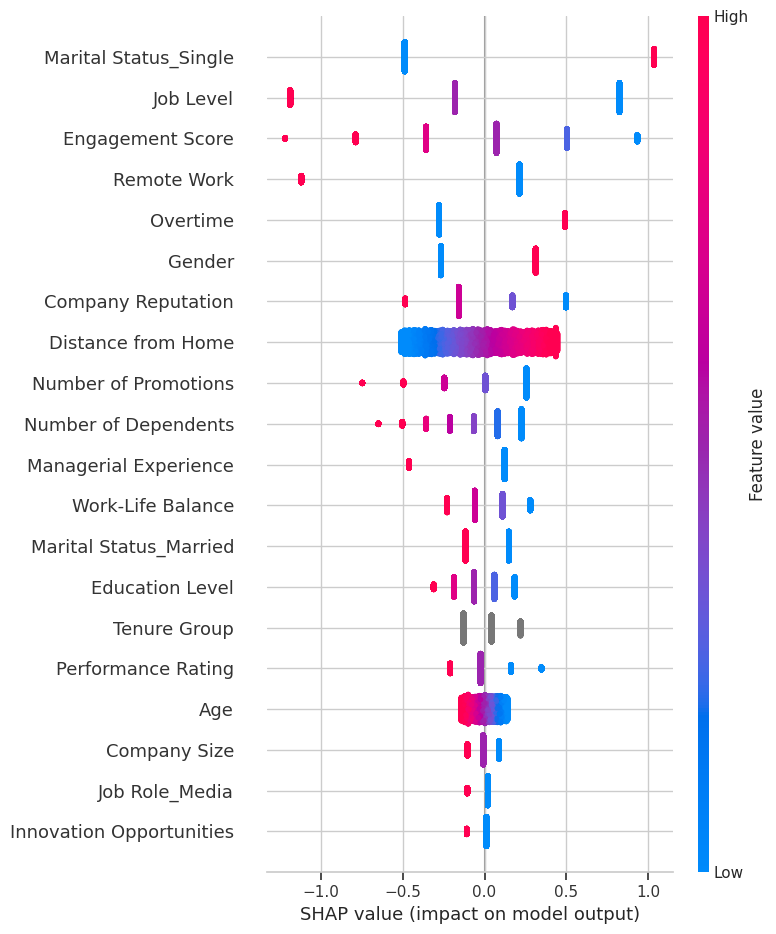

In [267]:
# Train logistic regression model
import shap
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP Explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary Plot: Global Feature Importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

This SHAP summary plot provides insights into how different features impact the model’s churn prediction. :

Key Takeaways:
Feature Importance (Y-axis order)

Features at the top (e.g., Job Level, Marital Status, Remote Work) have the strongest influence on employee churn.

Features at the bottom (e.g., Employee Recognition, Job Satisfaction) have a weaker influence.

SHAP Value (X-axis: Impact on Model Output)

A positive SHAP value (right) increases the probability of churn (employee leaving).

A negative SHAP value (left) decreases the probability of churn (employee staying).

Color Gradient (Feature Value: High/Low)

Red (High Feature Value): High feature values (e.g., high Job Level) influence churn in a specific way.

Blue (Low Feature Value): Low feature values (e.g., low Job Level) impact churn differently.

Detailed Observations:

✅ Job Level: Higher job levels (red) are associated with higher churn, while lower job levels (blue) reduce churn risk.

✅ Marital Status (Single): Single employees (red) are more likely to leave than married ones.

✅ Remote Work: Employees working remotely (red) tend to stay, while those on-site (blue) have higher churn.

✅ Work-Life Balance: Poor work-life balance (blue) increases churn risk.

✅ Performance Rating: No strong effect on churn (values are centered around zero).

📌 Conclusion & Next Steps:

🔹 Key Retention Factors: Focus on improving job satisfaction, employee recognition, and work-life balance to reduce churn.

🔹 Remote Work & Job Level: Employees at higher job levels with no remote work may require better incentives to stay.

🔹 Further Analysis: Investigate why single employees are leaving more and whether policies should be adjusted.

In [268]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.7462041973142587


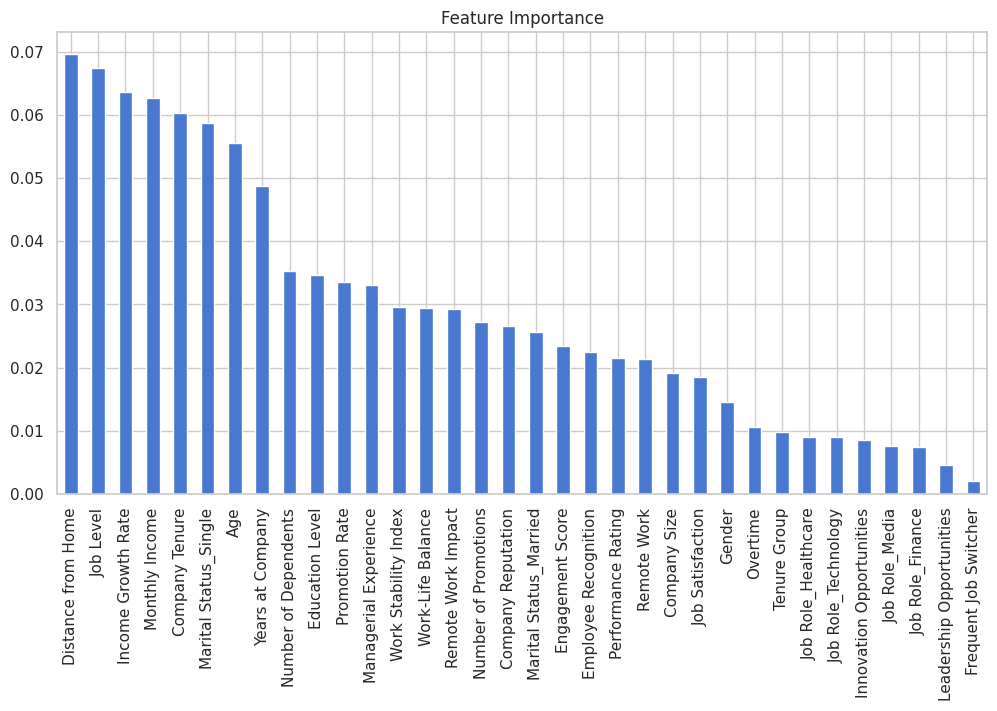

Distance from Home         0.07
Job Level                  0.07
Income Growth Rate         0.06
Monthly Income             0.06
Company Tenure             0.06
Marital Status_Single      0.06
Age                        0.06
Years at Company           0.05
Number of Dependents       0.04
Education Level            0.03
Promotion Rate             0.03
Managerial Experience      0.03
Work Stability Index       0.03
Work-Life Balance          0.03
Remote Work Impact         0.03
Number of Promotions       0.03
Company Reputation         0.03
Marital Status_Married     0.03
Engagement Score           0.02
Employee Recognition       0.02
Performance Rating         0.02
Remote Work                0.02
Company Size               0.02
Job Satisfaction           0.02
Gender                     0.01
Overtime                   0.01
Tenure Group               0.01
Job Role_Healthcare        0.01
Job Role_Technology        0.01
Innovation Opportunities   0.01
Job Role_Media             0.01
Job Role

In [269]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Sort and plot feature importance
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title="Feature Importance")
plt.show()

# Display top 10 most important features
print(importances.sort_values(ascending=False))

In [270]:
# Keep only the most important features (e.g., importance > 0.01)
important_features = importances[importances > 0.01].index
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]


In [271]:
model.fit(X_train_selected, y_train)
accuracy = model.score(X_test_selected, y_test)
print(f"New Accuracy: {accuracy:.4f}")


New Accuracy: 0.7466


In [272]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Train & evaluate each model
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name} Accuracy: {accuracy:.4f}")

    # Keep track of the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

# Print the best model
print(f"\n🚀 Best Model: {best_model} with Accuracy: {best_accuracy:.4f}")

Random Forest Accuracy: 0.7467
XGBoost Accuracy: 0.7586
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28162, number of negative: 31113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 59275, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475108 -> initscore=-0.099652
[LightGBM] [Info] Start training from score -0.099652
LightGBM Accuracy: 0.7602
Logistic Regression Accuracy: 0.7453

🚀 Best Model: LightGBM with Accuracy: 0.7602


---


1. Key Findings:

- High Attrition Groups: Identify which demographics (e.g., tenure groups, job roles) show the highest attrition rates.

Example: Employees with less than 5 years of tenure have the highest attrition rate.

- Income Impact: Analyze how monthly income affects attrition.
Example: Employees with lower monthly income are more likely to leave.
Promotion Patterns: Examine the relationship between promotions and attrition.

Example: Employees with fewer or no promotions are more likely to leave.

- Job Role Insights: Highlight job roles with the most significant attrition risks.

Example: Technology and Finance roles exhibit higher attrition compared to others.

2. Root Causes of Attrition:

- Low Promotion Rates: Employees with fewer career advancements are leaving at a higher rate.

- Compensation Issues: Lower-income employees tend to leave more frequently.

- Early-Career Turnover: Newer employees (less than 5 years) are most vulnerable to leaving.

### Proposed Solutions:

- Career Growth Programs: Implement structured promotion paths and mentorship programs.

- Competitive Compensation: Offer competitive salaries and performance-based incentives.

- Employee Engagement: Focus on early-tenure engagement programs and personalized onboarding.

- Retention Strategies: Provide targeted retention policies for high-risk job roles (e.g., Technology and Finance)